### A Report on car sales advert

Auto Trader is one of Manchester metropolitan university Patner and has over 90% prompted brand awareness with consumers and attracts over 50 million cross platform visits each month. The audience is not only large but highly engaged with a 75% share of minutes spent across automotive platforms.

####  Importing Packages

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set(style='ticks', context='talk', font_scale=0.8)
sns.set_palette('deep')
plt.figure(figsize=(9,6))
from scipy import stats
!pip install pandas.profiling --quiet
import pandas_profiling as pp 
!pip install -q shap
import shap
shap.initjs()
%matplotlib inline
import phik
from phik import resources, report
import warnings
warnings.filterwarnings('ignore')

In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='talk', font_scale=0.8, rc={'figure.figsize': (8,6)})
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
!pip install --upgrade scikit-learn==1.2.0

In [3]:
def countplot_(data, col,title):
    counts = data[col].value_counts()
    
    plt.figure(figsize=(7,7))
    ax = sns.countplot(y=data[col],
                      order = counts.index,
                      lw=1,
                      edgecolor = sns.color_palette('Greys',3)
                      )
    for x,y in enumerate(counts):
        ax.text(0.7, x,y,weight='bold', fontsize=9.5)
        plt.title(title,fontsize=12)

### 1. Data Understanding and Exploration

#### Importing the Data

In [4]:
adverts = pd.read_csv('/Users/macbook/Downloads/adverts.csv')




The first step will be to investigate and understand the data being analysed.

In [5]:
adverts.head(5) # output first five rows of the data

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [6]:
adverts[(adverts['reg_code'].isnull())]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
17,201911043995897,5.0,NaN,NaN,Nissan,X-Trail,NEW,NaN,27595,SUV,False,Diesel
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
401860,202010024501227,10.0,NaN,Silver,Mitsubishi,Shogun Sport,NEW,NaN,31999,SUV,False,Diesel
401890,202010104843364,5.0,NaN,Red,BMW,Z4,NEW,NaN,47910,Convertible,False,Petrol
401902,202010134960554,10.0,NaN,White,BMW,3 Series,NEW,NaN,35023,Saloon,False,Petrol
401905,202010144983518,0.0,NaN,Red,Land Rover,Range Rover Evoque,NEW,NaN,44995,SUV,False,Petrol


In [7]:
adverts.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [8]:
adverts.info() # get info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


- The following observations were made.
- The data set contains 402005 observations and 12 columns.
- The columns mileage, reg_code, standard_colour and year_of_registration have missing values.
- The columns public_reference, price are of int64 data type, mileage, year_of_registration are of float64 data type, and the rest of the columns are of object data type.
- Based on the adverts.info(), the data set uses 34.1+ MB of memory.
- The columns standard_make, standard_model, vehicle_condition, body_type and fuel_type are categorical data
- The columns public_reference, mileage, year_of_registration and price are numerical data
- The column crossover_car_and_van is of boolean data type.


In [9]:
adverts.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

#### 1.1. Meaning and Type of Features; Analysis of Distributions 

#### Meaning and Type of Features; Analysis of Distributions

##### Meaning and Type

- Mileage(Number): The number of miles travelled or covered by the Vehicle.
- Standard Colour(String):The color of the Vehicle.
- Standard Make(String): The make or brand of the Vehicle.
- Standard Model(String): The specific version of a car that is produced by the manufacturer.
- Vehicle Ccondition(String): Refers to the overall condition of the car and is often used to describe the quality of the vehicle and it is used for determining the price of the car.
- Price(Numeric): The price of the Vehicle refers to the monetary value of a car.
- Body Type(String): The body type of a vehicle refers to the physical design and layout of the car. It describes the shape and style of the car, as well as its purpose and intended use.
- Fuel Type(String): The fuel type of a vehicle refers to the type of fuel that is used to power the car's engine.In this column we have Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid' etc..
- Reg-code(String): This the age identifier. It is the code assigned to the year the vehicle is registered

##### Analysis of Distributions

###### PRICE

In [10]:
adverts.price.describe(datetime_is_numeric= False)

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64

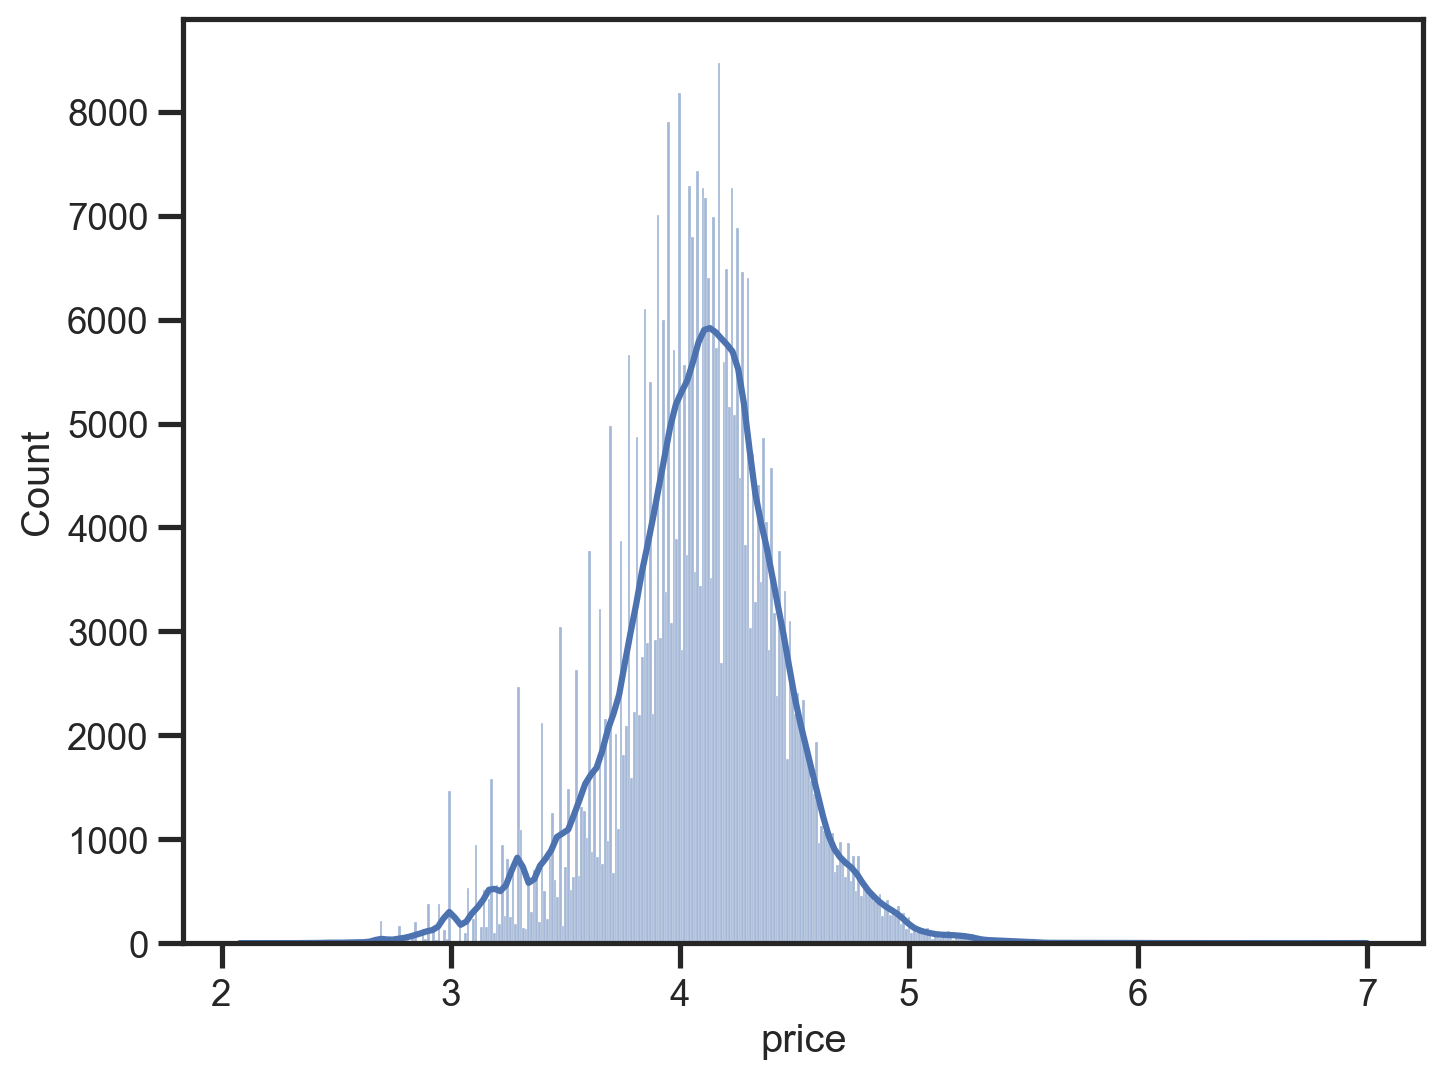

In [11]:
sns.histplot(np.log10(adverts.price), kde=True);

##### Vehicle Conditions

In [12]:
adverts.vehicle_condition.value_counts(normalize=True)

USED    0.922267
NEW     0.077733
Name: vehicle_condition, dtype: float64

In [13]:
adverts.vehicle_condition.describe()

count     402005
unique         2
top         USED
freq      370756
Name: vehicle_condition, dtype: object

In [14]:
np.max(adverts.price)

9999999

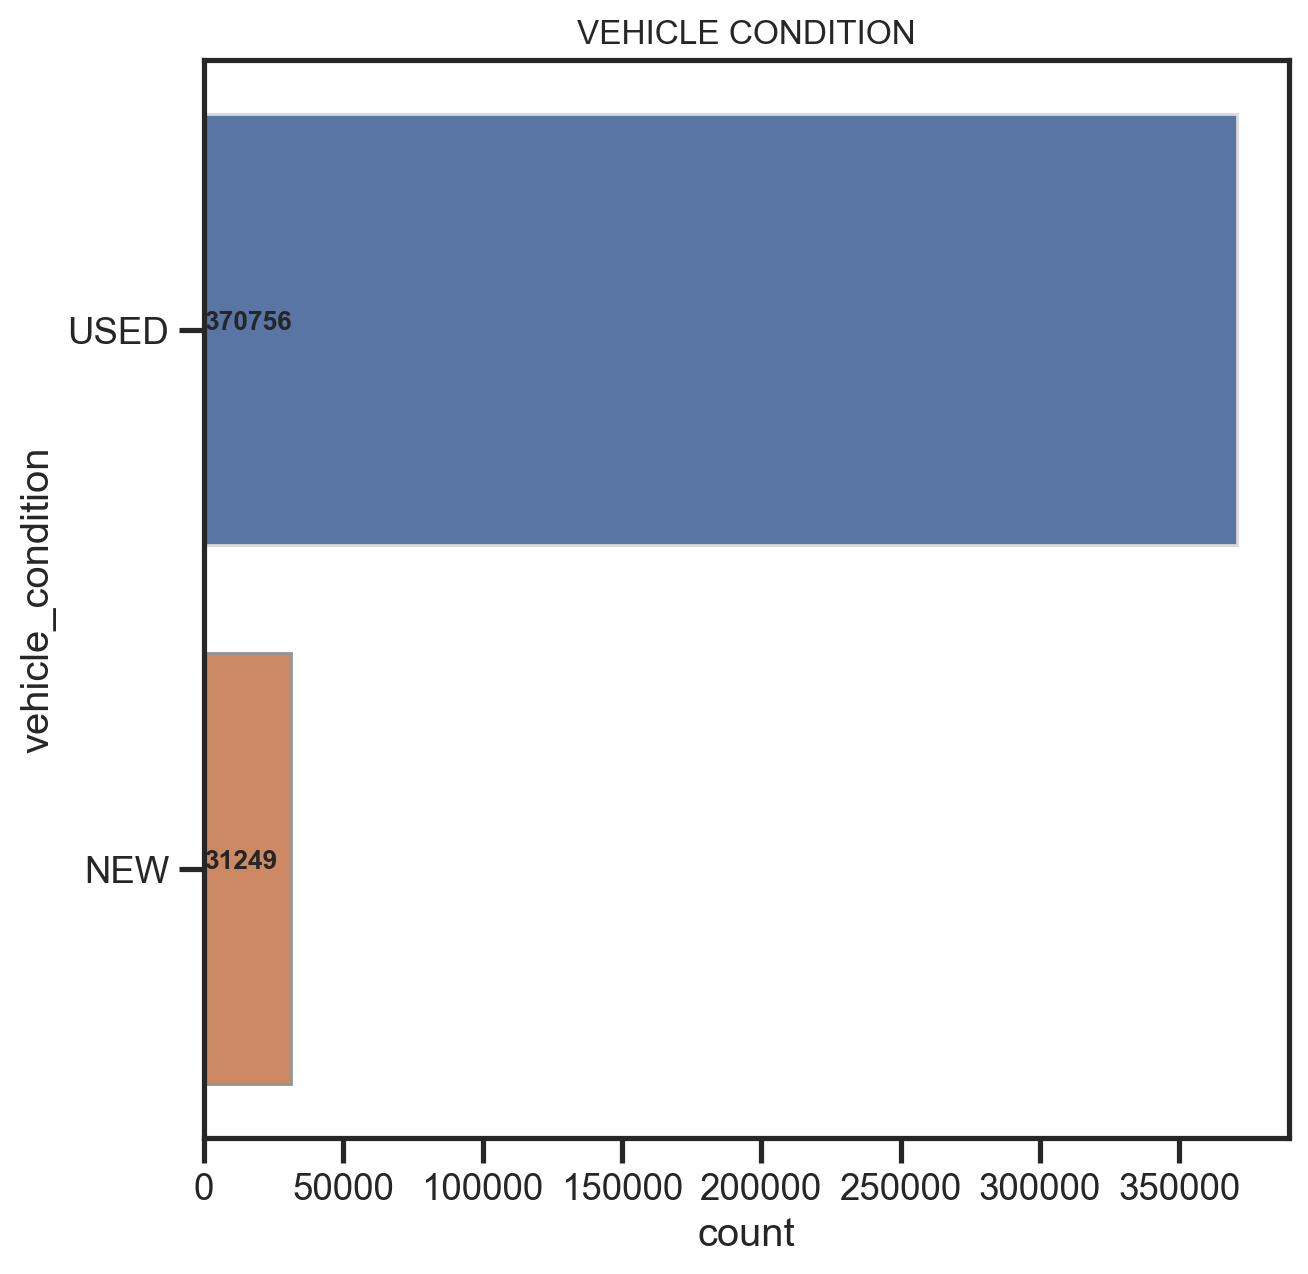

In [15]:
countplot_(adverts, 'vehicle_condition', "VEHICLE CONDITION") 

#### Standard Make

In [16]:
adverts.standard_make.value_counts(normalize=True).head()

BMW              0.092974
Audi             0.087760
Volkswagen       0.085188
Vauxhall         0.083830
Mercedes-Benz    0.079395
Name: standard_make, dtype: float64

In [17]:
adverts.standard_make.describe()

count     402005
unique       110
top          BMW
freq       37376
Name: standard_make, dtype: object

<AxesSubplot:xlabel='standard_make'>

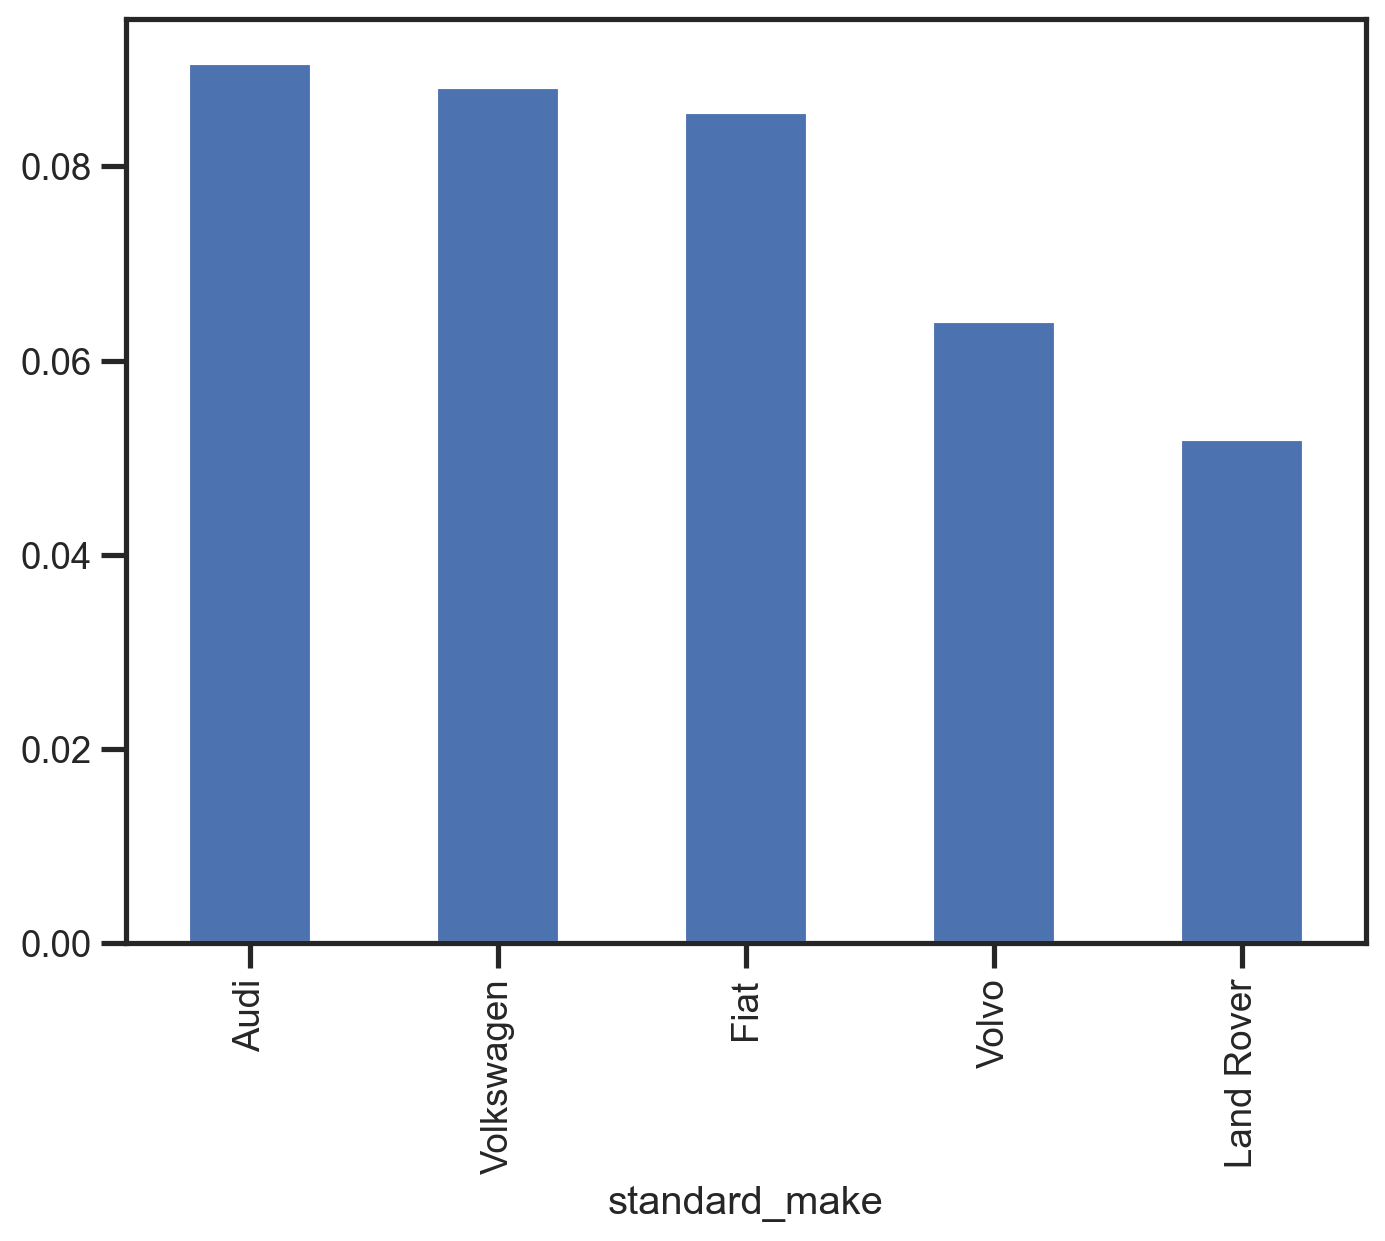

In [18]:
adverts.groupby('vehicle_condition').standard_make.value_counts(normalize=True).NEW.head().plot.bar()

<AxesSubplot:xlabel='standard_make'>

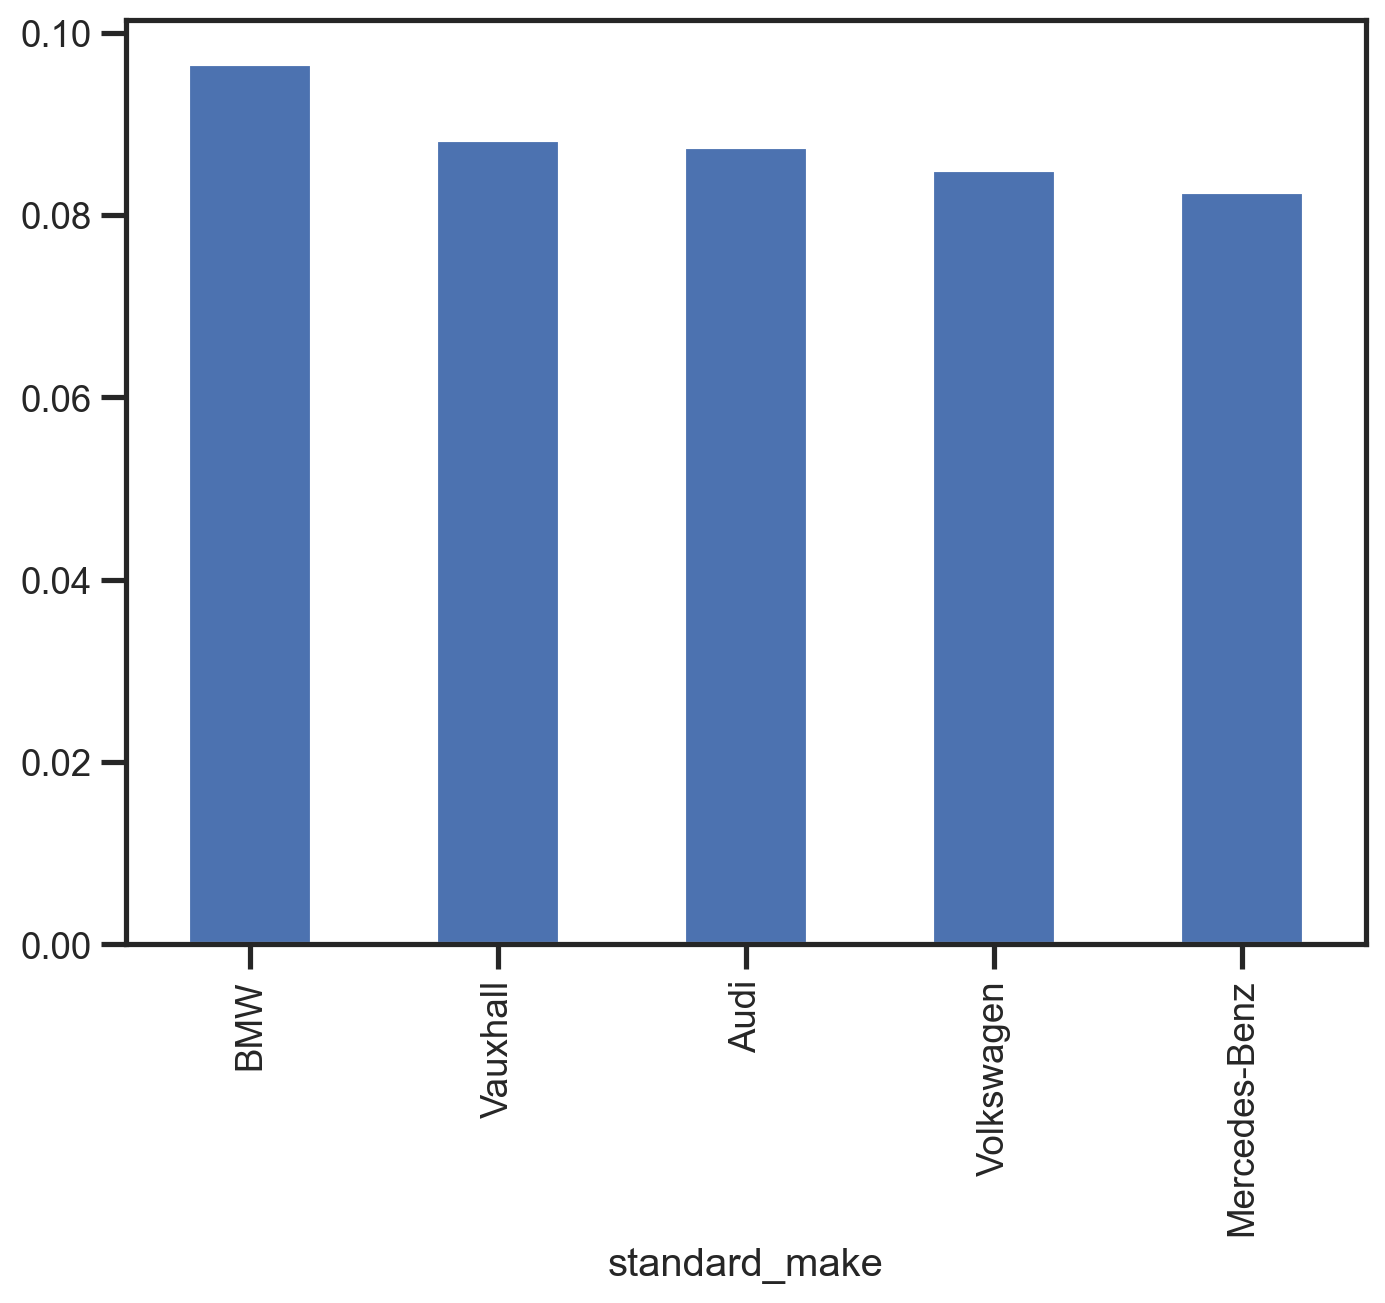

In [19]:
adverts.groupby('vehicle_condition').standard_make.value_counts(normalize=True).USED.head().plot.bar()

#### Fuel Type

In [20]:
adverts.fuel_type.value_counts()

Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64

In [21]:
adverts.fuel_type.describe()

count     401404
unique         9
top       Petrol
freq      216929
Name: fuel_type, dtype: object

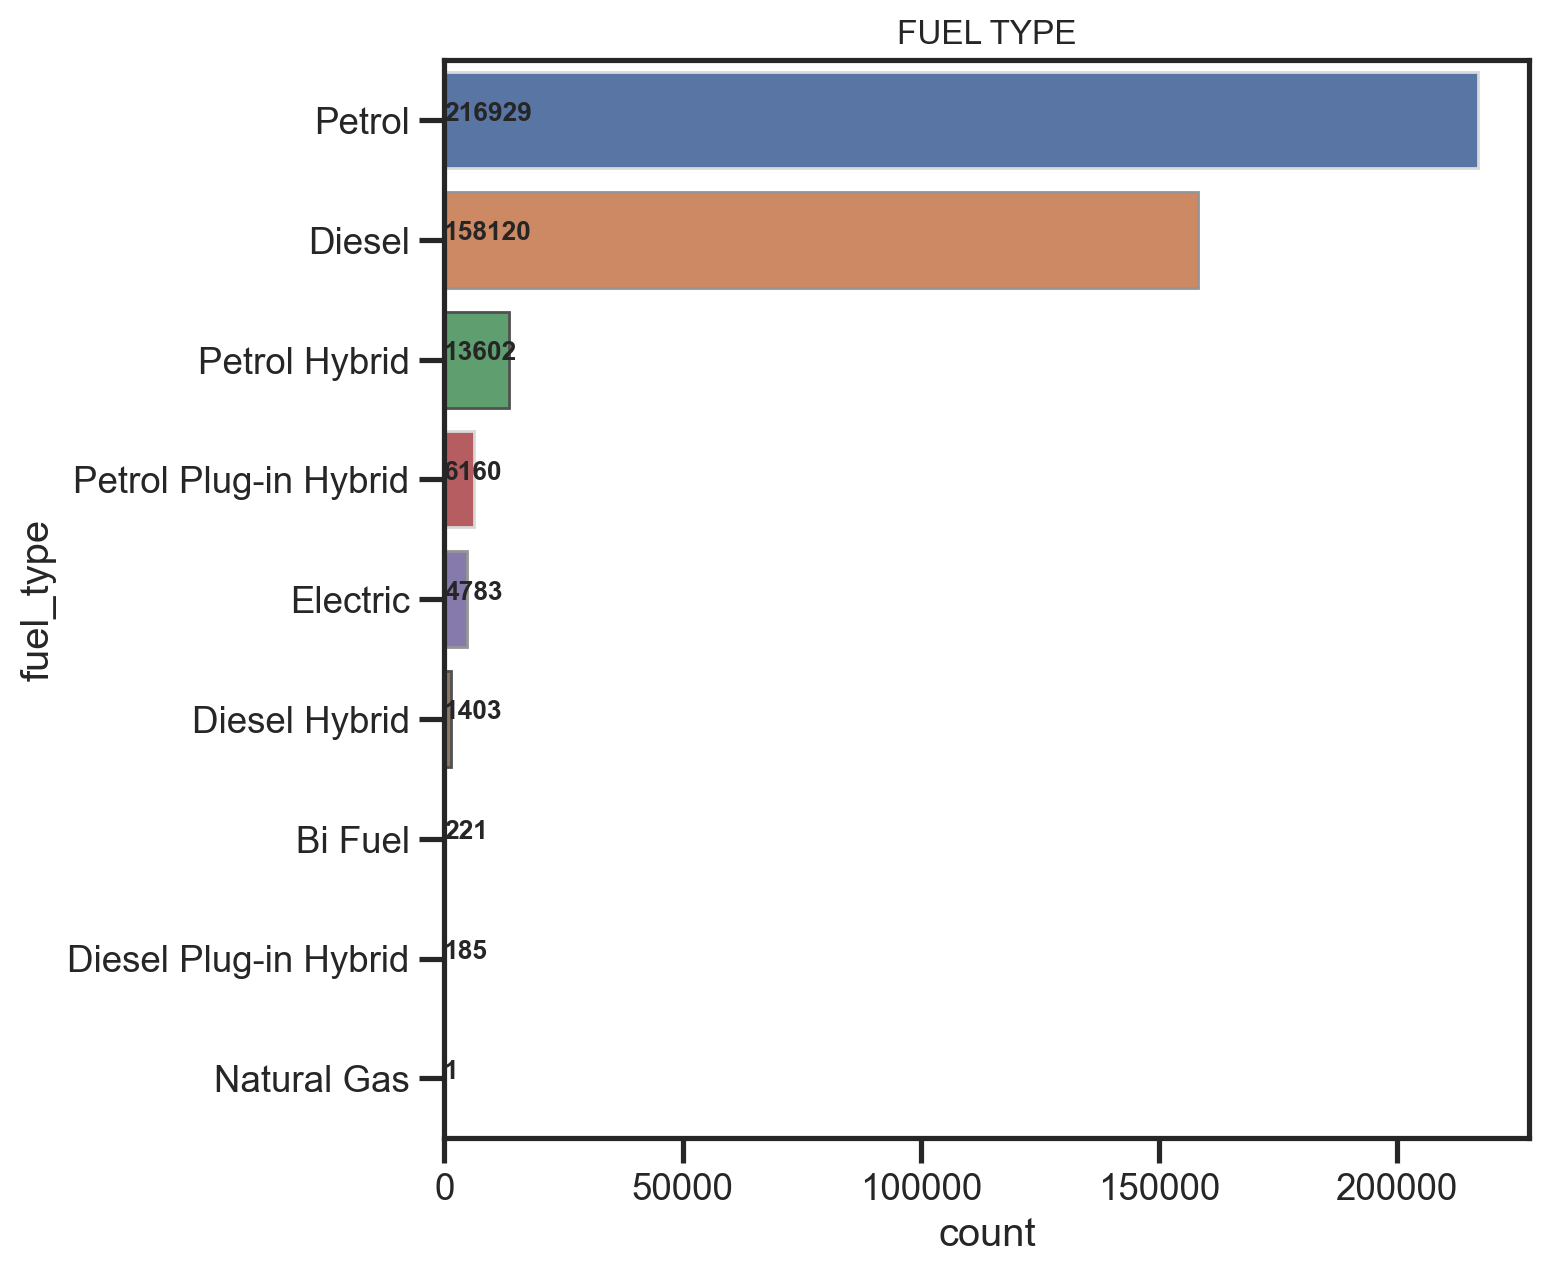

In [22]:
countplot_(adverts, 'fuel_type', "FUEL TYPE") 

##### 1.2. Identification/Commenting on Missing Values

In [23]:
adverts.isnull().sum() * 100 / len(adverts)

public_reference         0.000000
mileage                  0.031592
reg_code                 7.924528
standard_colour          1.337794
standard_make            0.000000
standard_model           0.000000
vehicle_condition        0.000000
year_of_registration     8.286215
price                    0.000000
body_type                0.208206
crossover_car_and_van    0.000000
fuel_type                0.149501
dtype: float64

There are 0.031592% missing values for the "mileage" column, 7.924528% missing values for the "reg_code" column, 1.337794%  missing values for the "standard_colour" column, 8.286215% missing values for the "year_of_registration" column, 0.208206% missing values for the "body_type" column, and 0.149501% missing values for the "fuel_type" column.

It is important to address missing values in our data because a significant percentage of missing values could potentially introduce bias into our analysis. Ignoring the missing values could lead to inaccurate or misleading conclusions. Instead, we should consider methods for handling missing values in a way that minimizes the potential for bias. This could include imputing the missing values using a statistical method, or excluding certain observations from the analysis if the missing values are not able to be imputed.

### PRICE

<AxesSubplot:xlabel='price'>

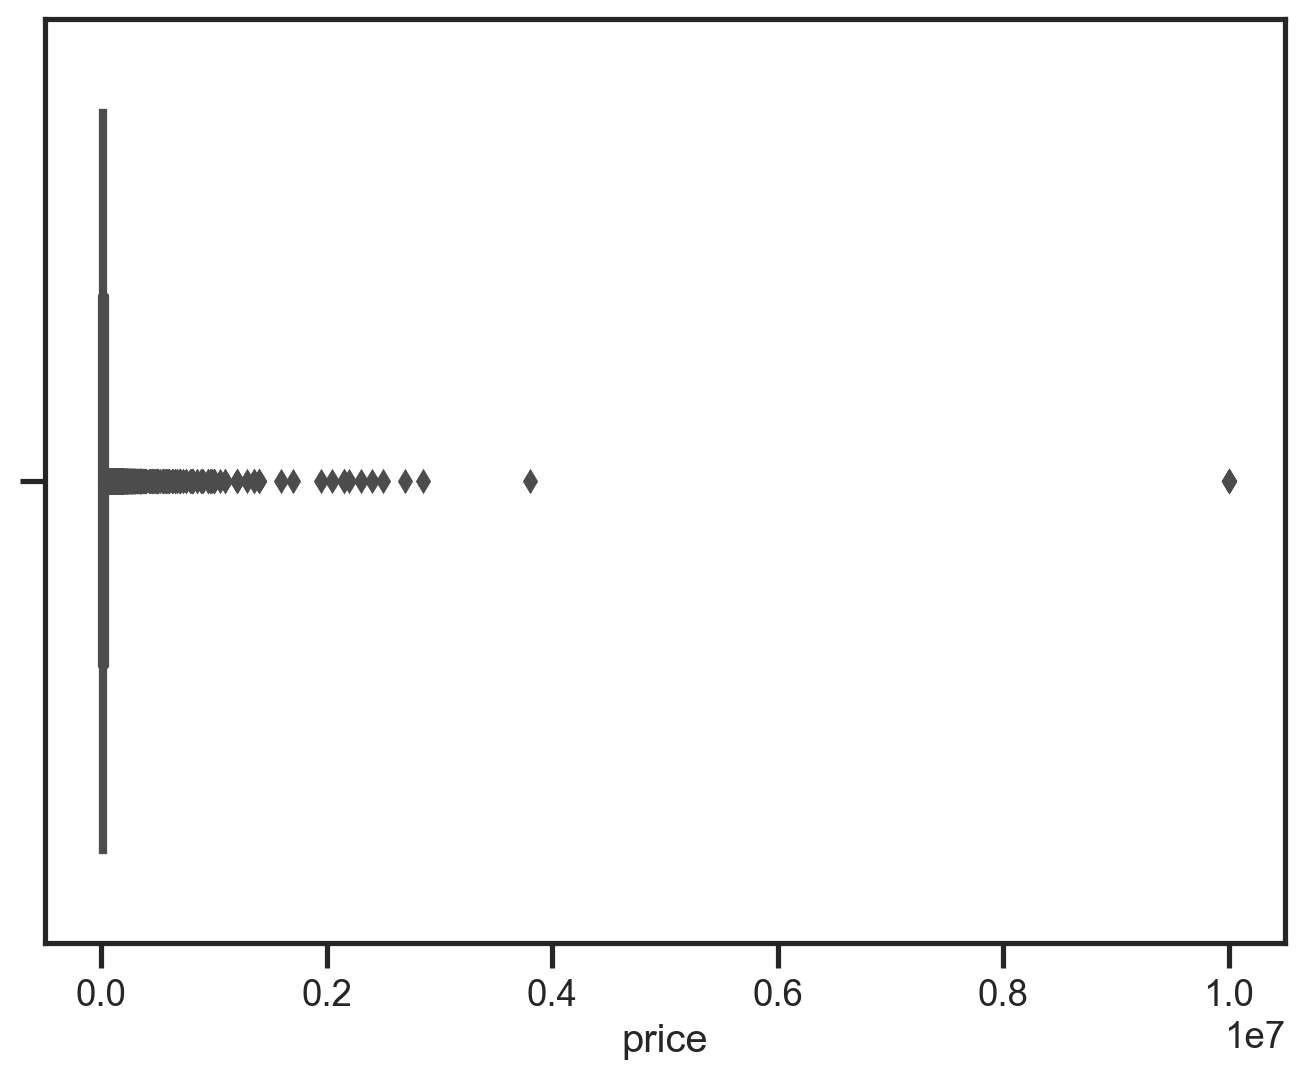

In [24]:
sns.boxplot(x = (adverts['price']))

<AxesSubplot:ylabel='price'>

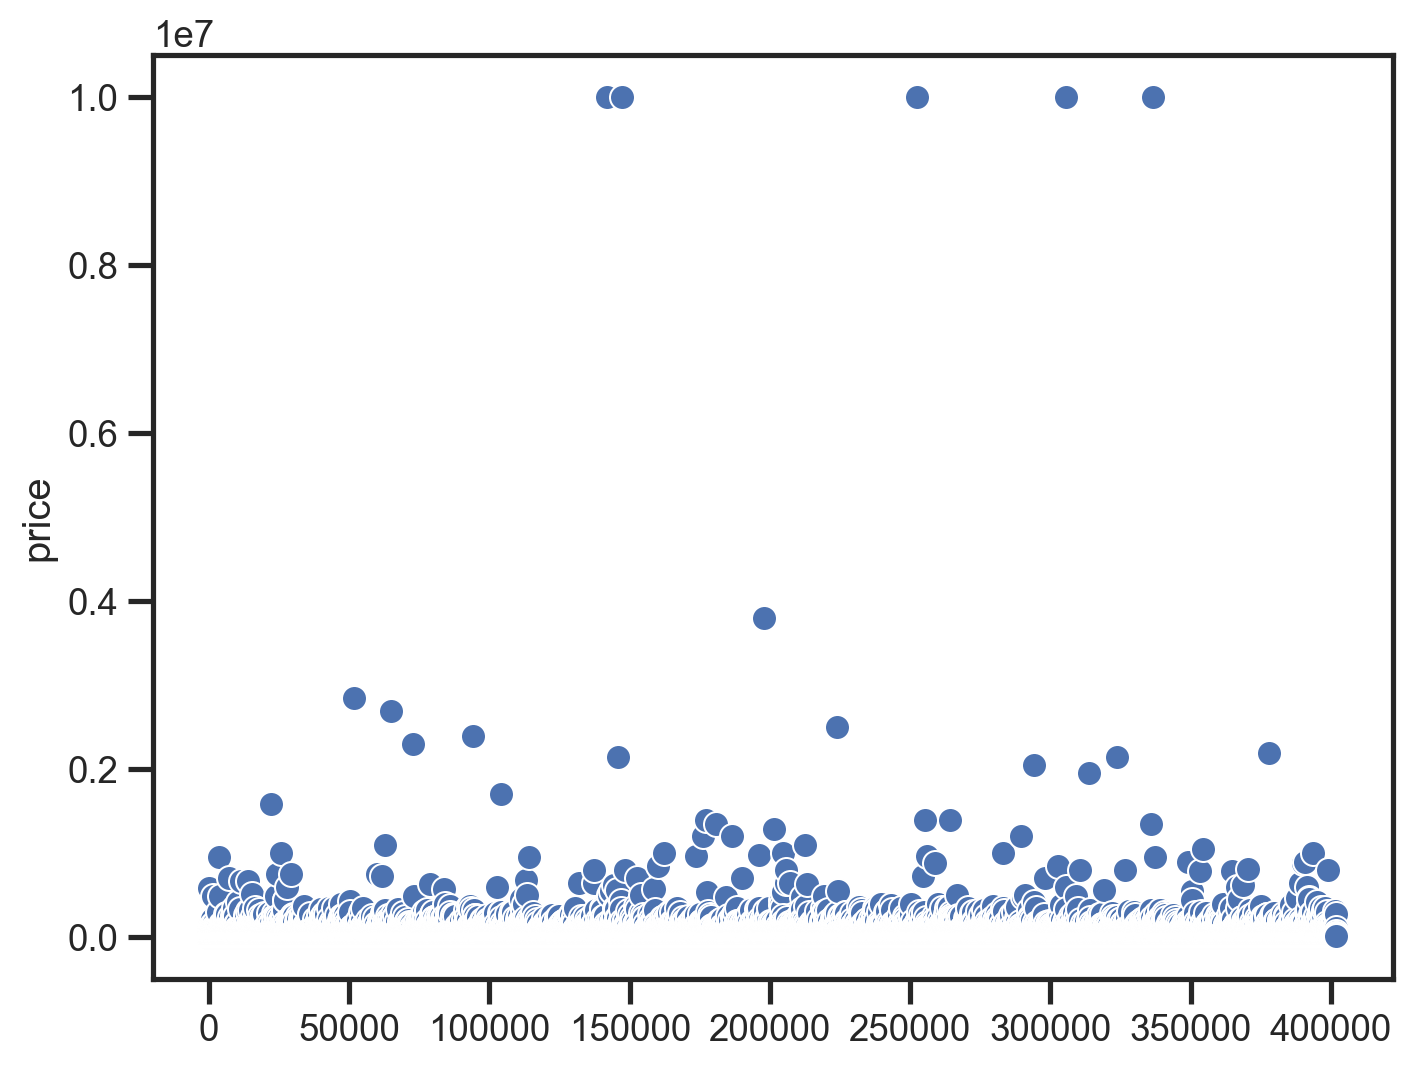

In [25]:
sns.scatterplot(data=adverts['price'])

<AxesSubplot:ylabel='price'>

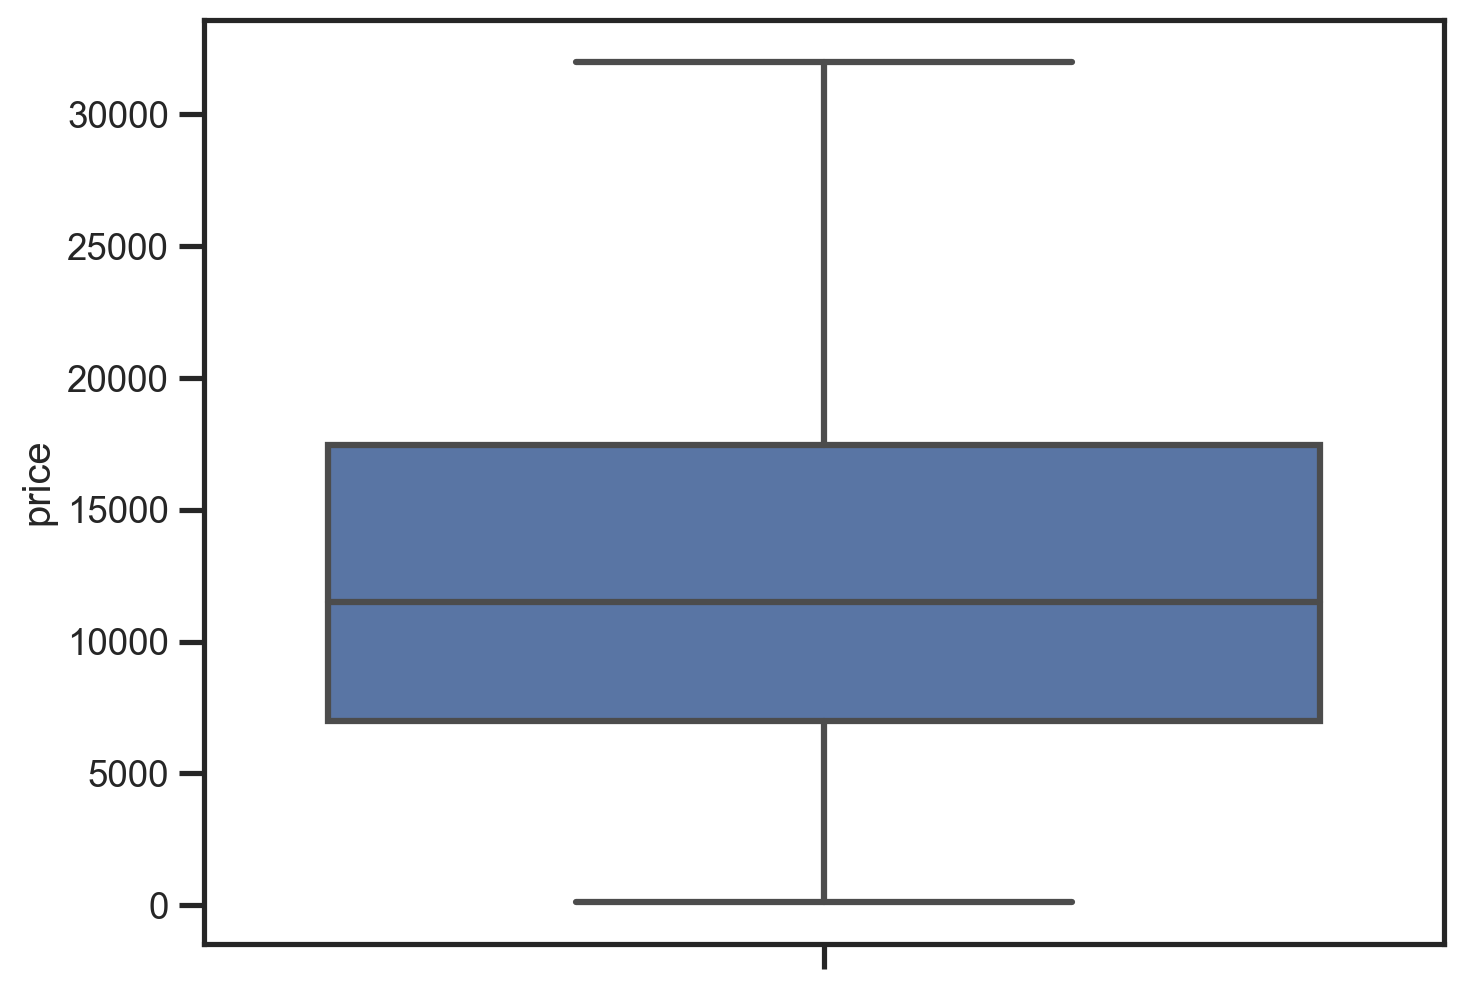

In [26]:
sns.boxplot(y=adverts[adverts['price']<=adverts['price'].quantile(0.9)]['price'])

In [27]:
adverts[adverts['price']>adverts['price'].quantile(0.9)].sort_values('price',ascending=False)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
305436,201812223434109,3600.0,NaN,Grey,Lamborghini,Miura,USED,NaN,9999999,Coupe,False,Petrol
147188,202009103539048,100.0,NaN,Grey,Maserati,3500,USED,NaN,9999999,Convertible,False,Petrol
252505,202008112331147,46300.0,NaN,Blue,Ferrari,275,USED,NaN,9999999,Coupe,False,Petrol
336202,202001226429470,950.0,NaN,Black,Ferrari,LaFerrari,USED,NaN,9999999,Coupe,False,Petrol
141833,202007050883898,87450.0,NaN,Red,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
282378,202010024497992,4551.0,20,White,Lexus,UX 250h,USED,2020.0,31991,SUV,False,Petrol Hybrid
355964,202010225309718,15.0,20,White,Mitsubishi,Outlander,USED,2020.0,31991,SUV,False,Petrol Plug-in Hybrid
82665,202010225300337,12138.0,19,Red,Jaguar,XF,USED,2019.0,31991,Estate,False,Diesel
344186,202010215264417,5662.0,20,White,Volkswagen,Tiguan,USED,2020.0,31991,SUV,False,Petrol


There are some extreme values in the dataset that might not be representative of the rest of the data.
The datasets includes car prices and the extreme values are for exotic or luxurious cars which are significantly different from the rest. This affects the overall distribution and spread of the data. For example the prices of Lamborghini,Maserati or Ferrari are pegged at 9999999 while the mean prices is 17341.97. The  outliers are all above the 90th percentile. 

##### Mileage

<AxesSubplot:xlabel='mileage'>

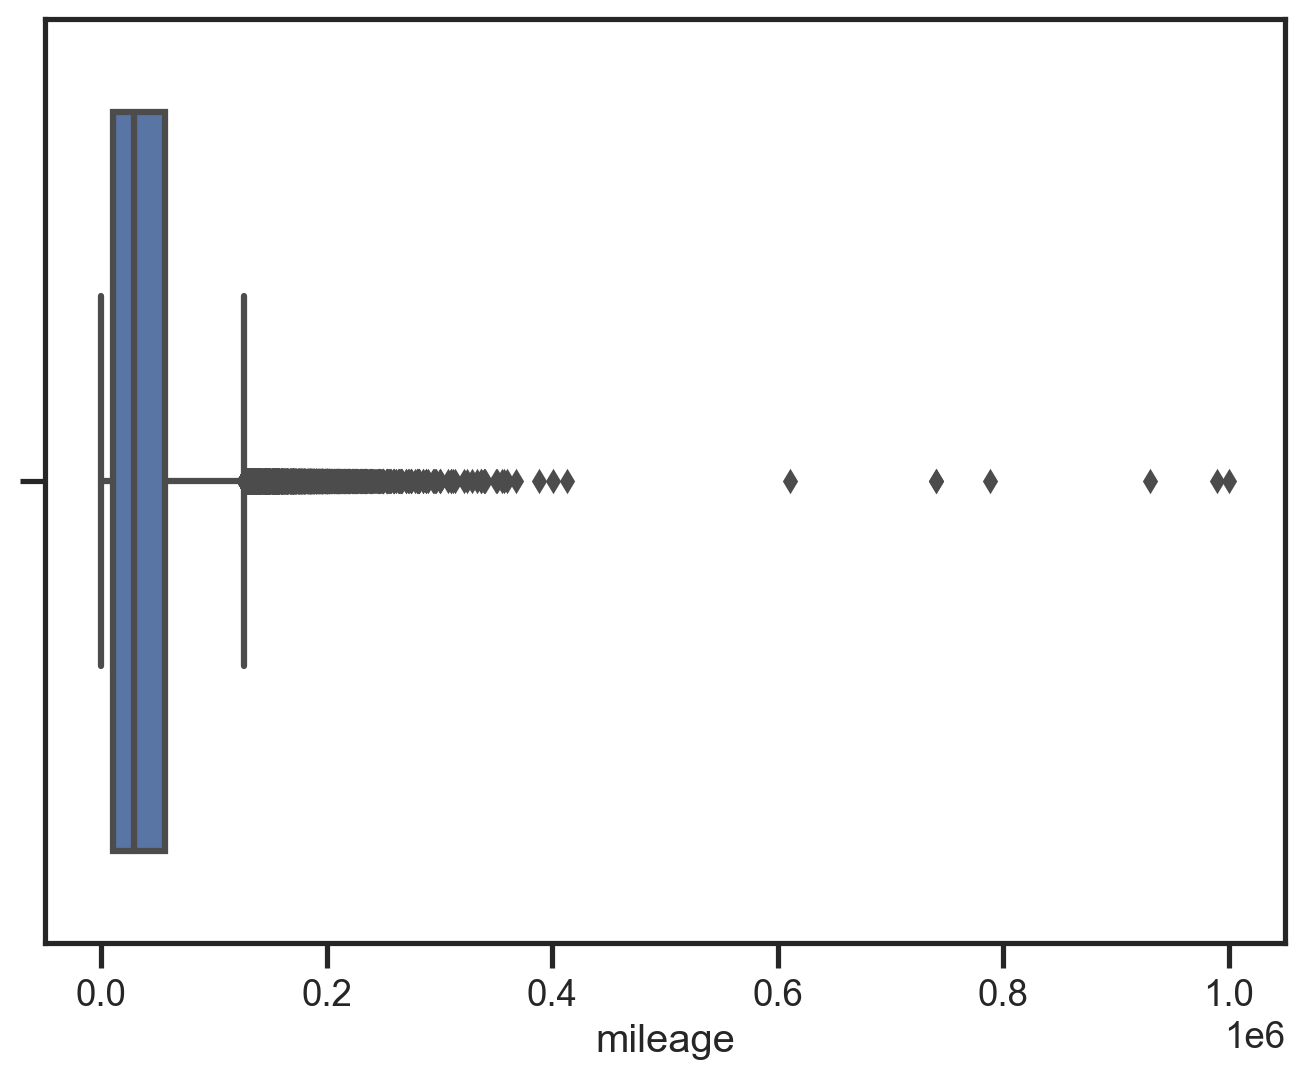

In [28]:
sns.boxplot(x = adverts['mileage'])

<AxesSubplot:ylabel='mileage'>

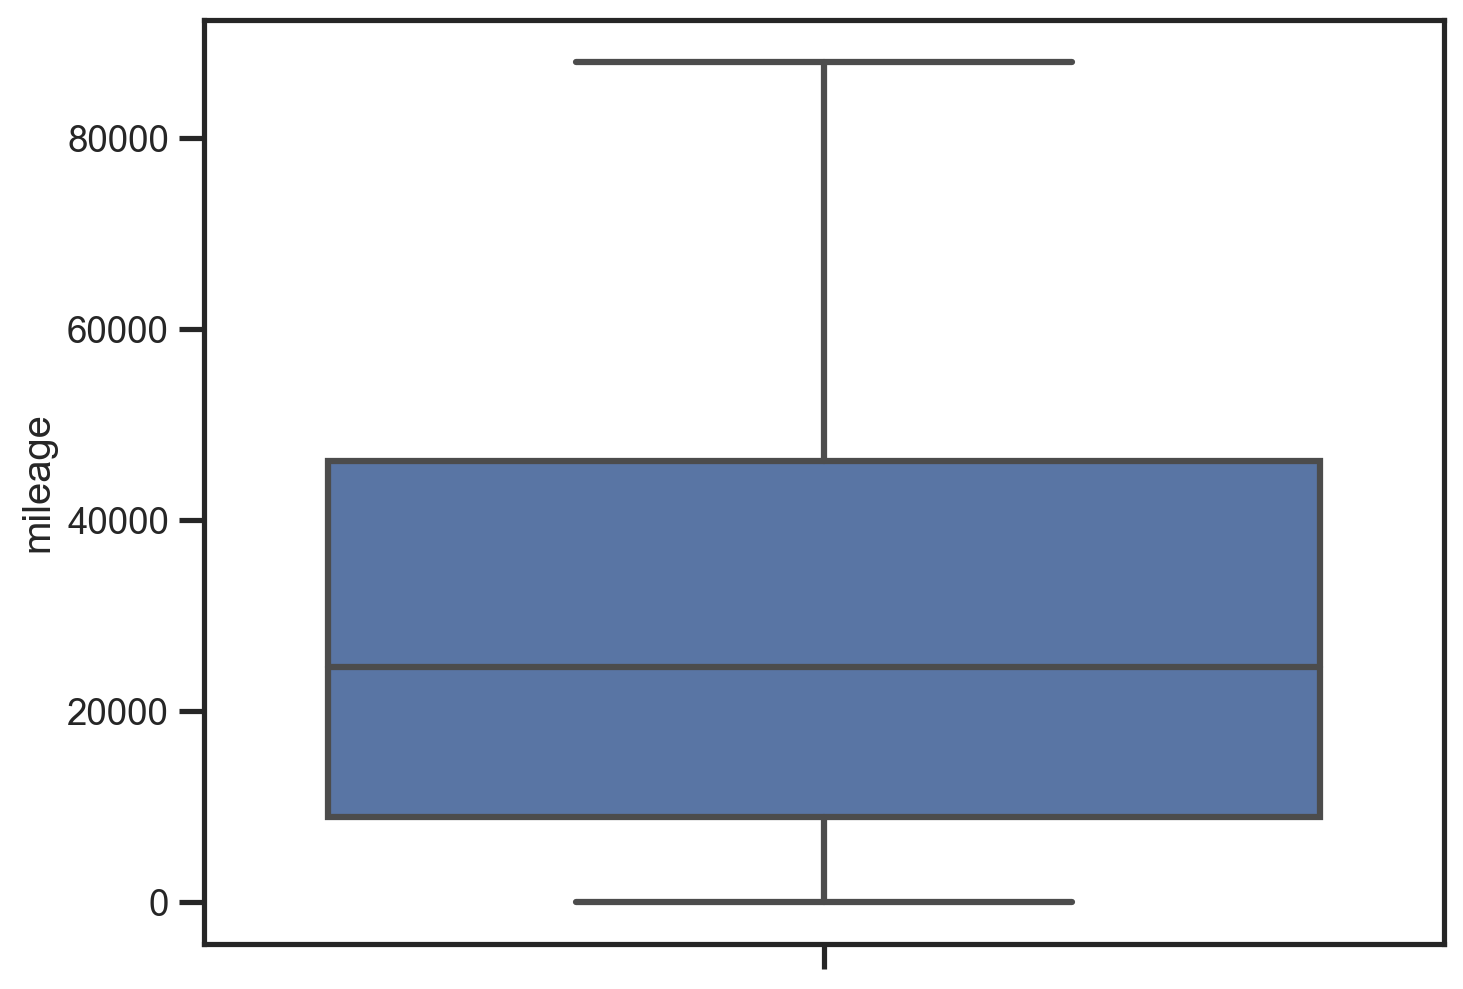

In [29]:
sns.boxplot(y=adverts[adverts['mileage']<=adverts['mileage'].quantile(0.9)]['mileage'])

In [30]:
adverts[adverts['mileage']<=adverts['mileage'].quantile(0.9)].sort_values('mileage',ascending=False)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
253715,202010185151833,88000.0,66,Black,Audi,S3,USED,2016.0,20000,Hatchback,False,Petrol
87538,202008273005351,88000.0,08,Blue,Volvo,V70,USED,2008.0,4999,Estate,False,Diesel
303968,202010144994767,88000.0,13,Silver,Kia,Venga,USED,2013.0,2500,Hatchback,False,Petrol
138120,202008162564518,88000.0,53,Silver,Lexus,SC 430,USED,2004.0,8995,Convertible,False,Petrol
299264,202010144988131,88000.0,13,Silver,Kia,Ceed,USED,2013.0,5295,Estate,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
202732,202008212777288,0.0,NaN,White,Volvo,XC40,NEW,NaN,36220,SUV,False,Petrol
370471,202007010716402,0.0,NaN,White,Fiat,Tipo,NEW,NaN,17300,Hatchback,False,Petrol
202717,202008042080246,0.0,NaN,White,Hyundai,i10,NEW,NaN,14120,Hatchback,False,Petrol
202698,202007101067814,0.0,NaN,NaN,Land Rover,Defender 110,NEW,NaN,64170,SUV,False,Diesel


In [31]:
adverts[adverts['mileage']<=adverts['mileage'].quantile(0.9)].sort_values('vehicle_condition',ascending=True)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
350702,202009053362720,0.0,NaN,White,Renault,Kadjar,NEW,NaN,19995,SUV,False,Petrol
163329,202010275475663,0.0,NaN,Black,Fiat,Tipo,NEW,NaN,17344,Hatchback,False,Petrol
350675,202008132441106,6.0,NaN,White,MINI,Hatch,NEW,NaN,18414,Hatchback,False,Petrol
350668,202008032030592,0.0,NaN,Blue,Alfa Romeo,Stelvio,NEW,NaN,47270,SUV,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
140080,202010245397762,29000.0,66,White,MINI,Hatch,USED,2016.0,8999,Hatchback,False,Diesel
140079,202010245389539,42000.0,66,Blue,BMW,1 Series,USED,2016.0,15490,Hatchback,False,Petrol
140077,202010245380220,35000.0,13,Silver,Kia,Ceed,USED,2013.0,6495,Estate,False,Diesel
140088,202010275504535,29900.0,17,White,Vauxhall,Astra,USED,2017.0,9995,Hatchback,False,Petrol


The datasets includes mileage of used cars.The outliers are of a very used car which are significantly different from the rest.For example, in the case of mileage for very used cars, an outlier might represent a car with an unusually high mileage due to some unusual circumstance, such as being used as a taxi or rental car. Most of the cars with extreme mileage are registered as far back as 2008. The  outliers are all above the 90th percentile.
With further sub-setting, new cars have 0 mileage which makes sense as they are yet to be driven.

In [32]:
adverts['standard_colour'].mode()[0]

'Black'

## 2. Data Processing

## 2.1. Dealing with Missing Values, Outliers, and Noise

### Standard Color

In [33]:
# Identify the unique values of the 'standard_colour' and 'standard_make' columns in the 'adverts' DataFrame.
color_type = adverts.standard_colour.unique()
make_types = adverts.standard_make.unique()


color_type
make_types
# Initialize an empty list called 'newList'.
newList = []

# Iterate through the unique values in 'make_types'.
for L in make_types:
    if L in ["Reliant","Pontiac"] :
        a = adverts.loc[adverts['standard_make'] == L]
        a['standard_colour'] = a['standard_colour'].fillna('Black')
        newList.append(a)
    else: 
    
        x = adverts.loc[adverts['standard_make'] == L]

#         print(L)
        e = x.standard_colour.mode()[0]

#         print(L,e)

    
        x['standard_colour'] = x['standard_colour'].fillna(e)

        newList.append(x)
advertss = pd.concat(newList)
advertss = advertss.reset_index()

For each value in 'make_types', check if it is either 'Reliant' or 'Pontiac'(as they only occur once and have NAN value for standard colour). If it is, select all rows from the 'adverts' DataFrame where the value of the 'standard_make' column is equal to the current value in the iteration, and assign the result to a new DataFrame called 'a'. Then, fill any null values in the 'standard_colour' column of 'a' with the string 'Black', and append 'a' to 'newList'.
If the value in 'make_types' is not 'Reliant' or 'Pontiac', select all rows from the 'adverts' DataFrame where the value of the 'standard_make' column is equal to the current value in the iteration, and assign the result to a new DataFrame called 'x'. Then, fill any null values in the 'standard_colour' column of 'x' with the mode (most common value) of the 'standard_colour' column in 'x', and append 'x' to 'newList'.
Concatenate all the DataFrames in 'newList' into a single DataFrame called 'advertss'.
Reset the index of 'advertss' to start from 0.

### Mileage

In [34]:
advertss.mileage = advertss.mileage.fillna(advertss.mileage.mean())

This fills any null values in the 'mileage' column with the mean of the column. Finally, the resulting series is assigned back to the 'mileage' column of 'advertss', effectively replacing the null values in the original column with the mean value

### Dealing with the Mileage outlier

<AxesSubplot:xlabel='mileage'>

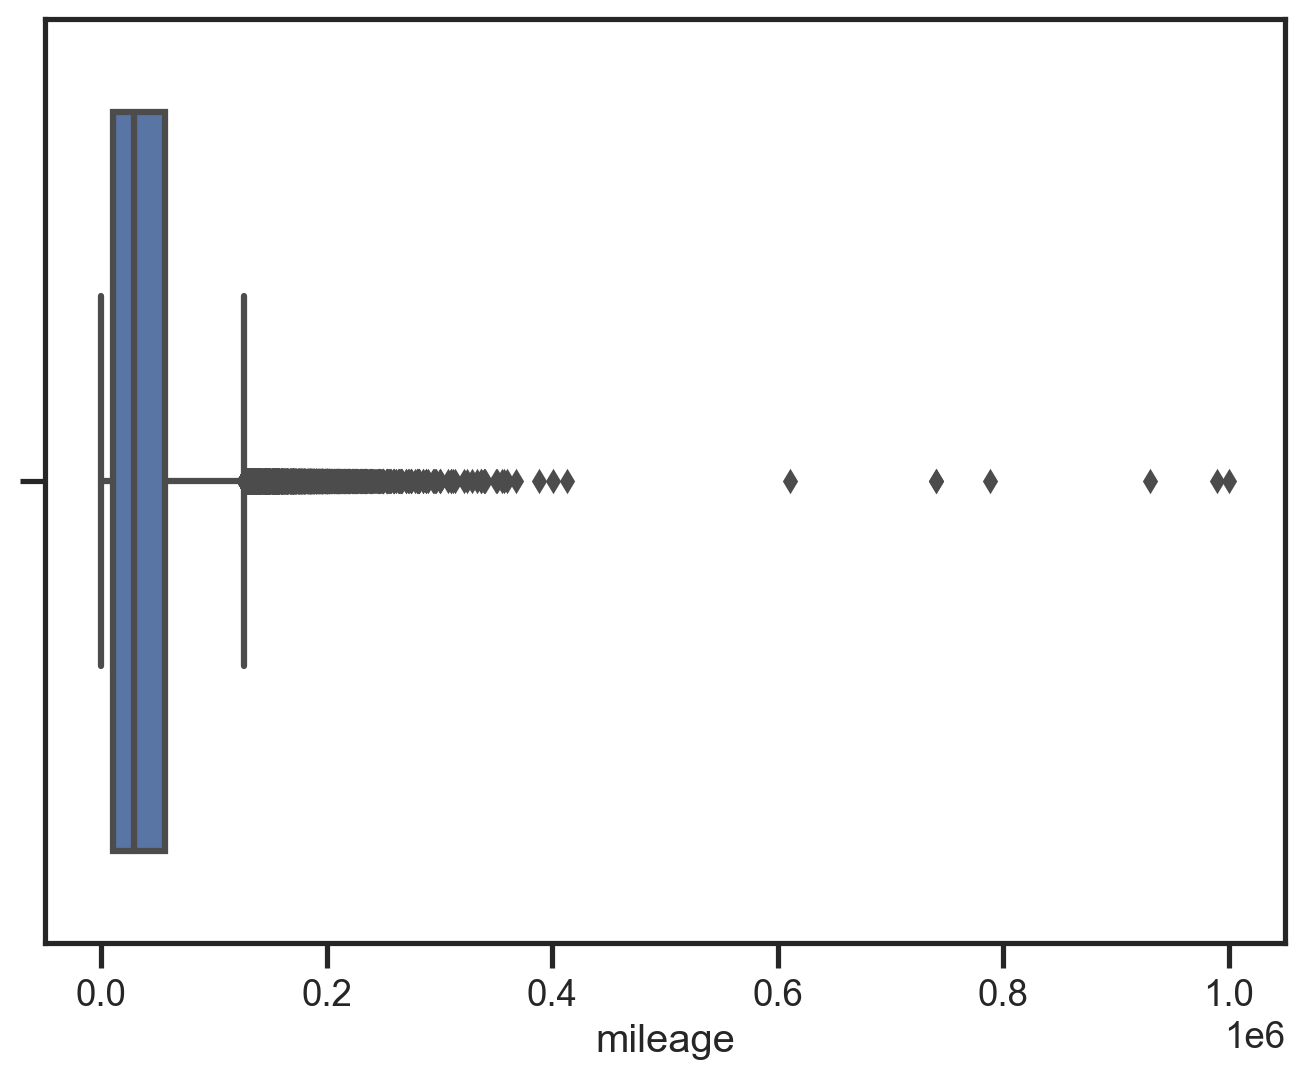

In [35]:
sns.boxplot(x = adverts['mileage'])

<AxesSubplot:ylabel='mileage'>

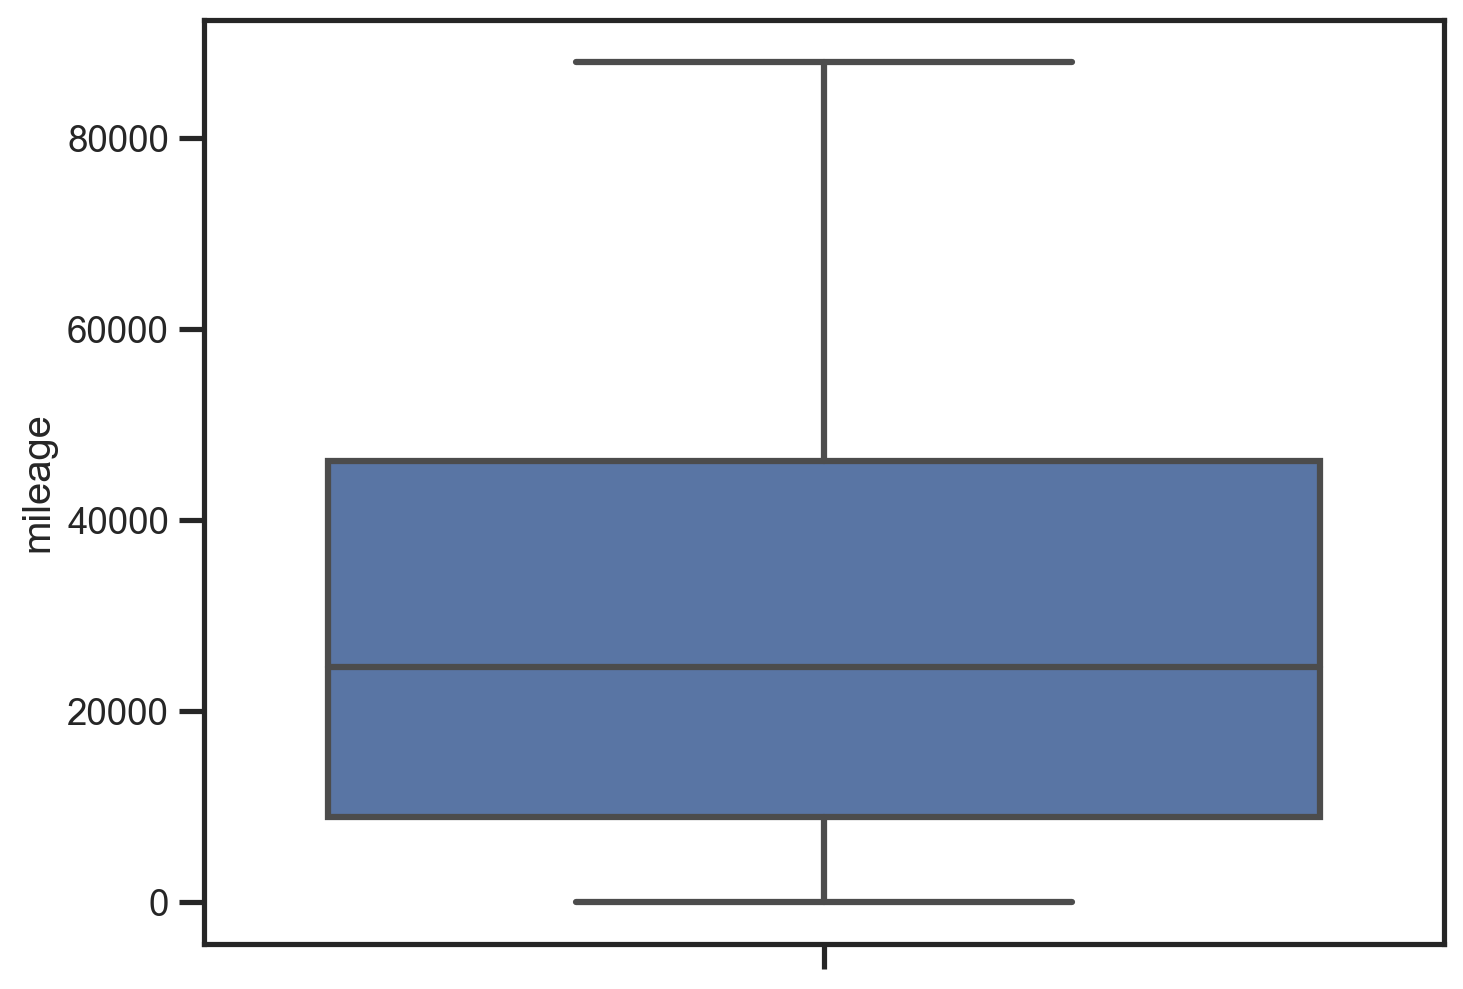

In [36]:
sns.boxplot(y=adverts[adverts['mileage']<=adverts['mileage'].quantile(0.9)]['mileage'])

In [37]:
advertss.loc[advertss['mileage'] > advertss['mileage'].quantile(0.9),'mileage'] = np.median(advertss['mileage'])

The outliers seem to be above the 90th percentile of the mileage column.
The code above  uses the 'loc' indexer and the 'quantile()' method to select all rows in 'advertss' where the value of the 'mileage' column is greater than the 90th percentile of the 'mileage' column. It then uses NumPy's 'median()' function to compute the median value of the 'mileage' column and assigns this value to all the selected rows. This effectively replaces the values in the 'mileage' column that are greater than the 90th percentile with the median value because the mean value is highly influenced by the outliers.

#### PRICE

I will be dealing with the outliers of new vehicles and used vehicles differently because of the the way the data is distributed(majority of used cars).
Majority of the price outliers are of the new vehicles.

In [38]:
 newAdvertss = advertss[advertss.vehicle_condition == 'NEW']
    
# newAdvertss[newAdvertss['price'] <= newAdvertss['price'].quantile(0.9)]

<AxesSubplot:>

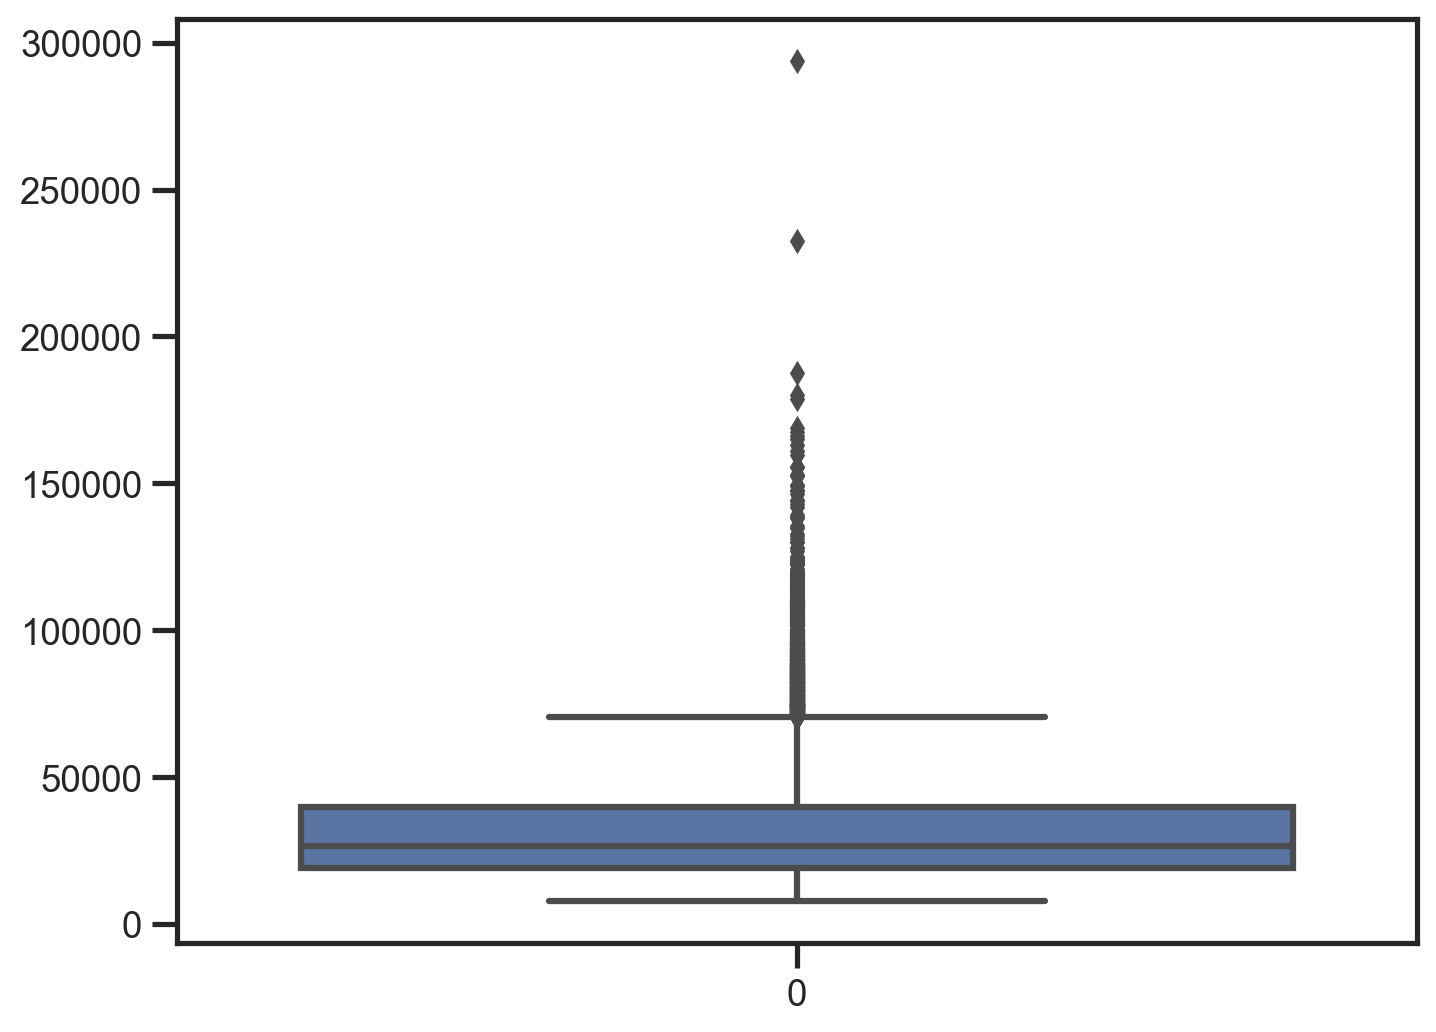

In [39]:
sns.boxplot(newAdvertss['price'])

<AxesSubplot:ylabel='price'>

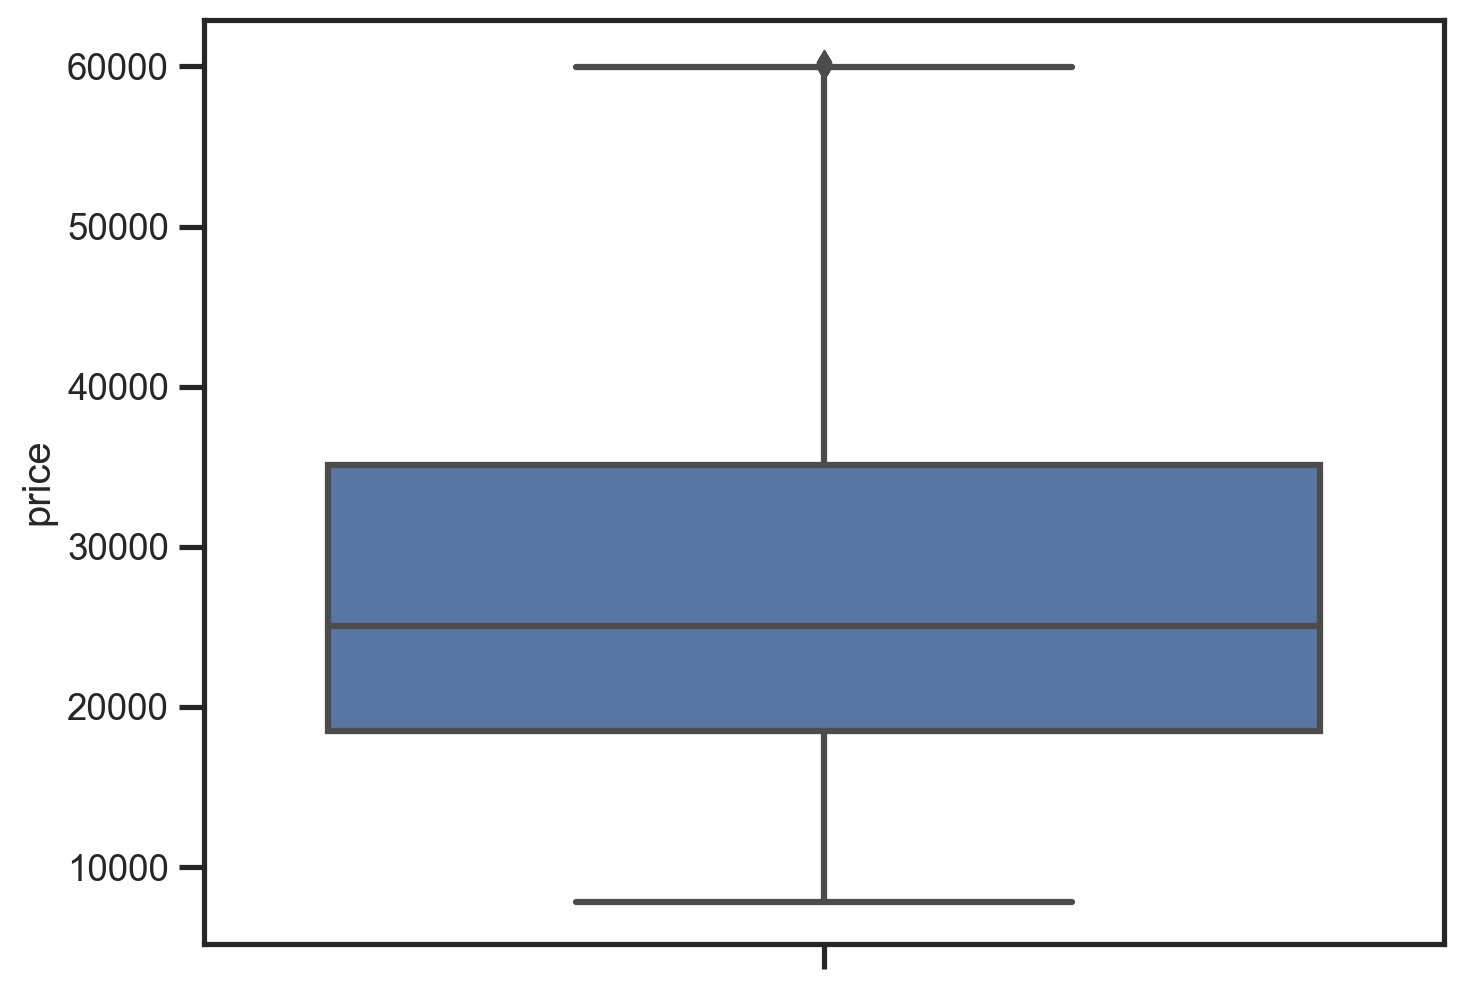

In [40]:
sns.boxplot(y=newAdvertss[newAdvertss['price']<=newAdvertss['price'].quantile(0.9)]['price'])

In [41]:
newAdvertss.loc[newAdvertss['price'] > newAdvertss['price'].quantile(0.9),'price'] = np.median(newAdvertss['price'])

In [42]:
newAdvertss.price.quantile(0.90)

44317.600000000006

In [43]:
newAdvertss.shape

(31249, 13)

In [44]:
 oldAdvertss = advertss[advertss.vehicle_condition == 'USED']

In [45]:
oldAdvertss.shape

(370756, 13)

In [46]:
oldAdvertss.price.quantile(0.90)

28500.0

<AxesSubplot:ylabel='price'>

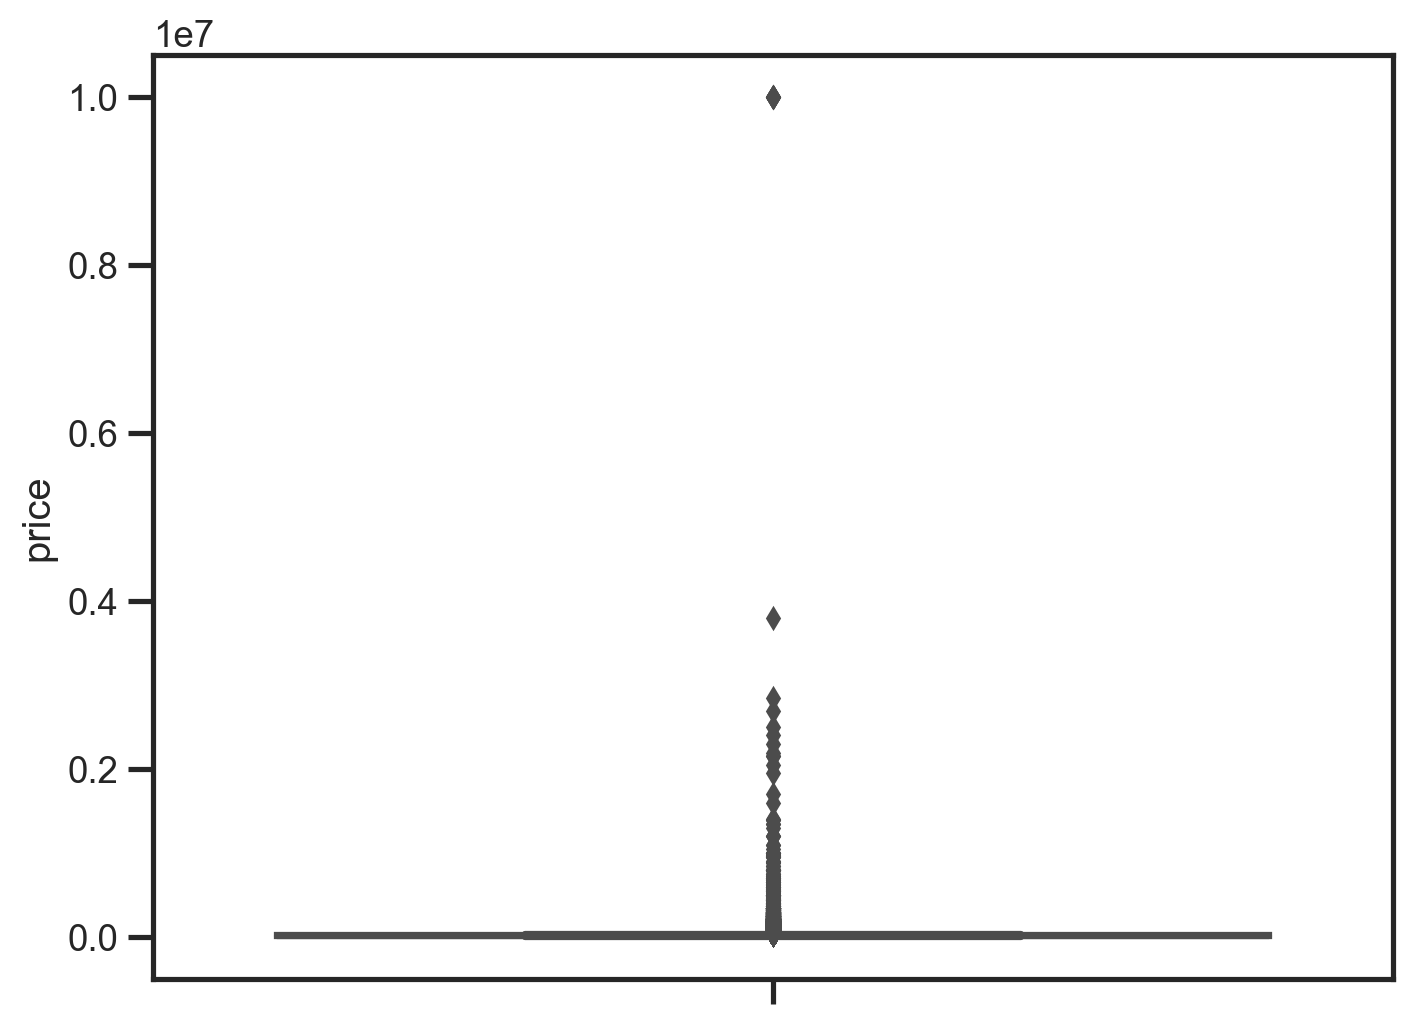

In [47]:
sns.boxplot(y=oldAdvertss['price'])

<AxesSubplot:ylabel='price'>

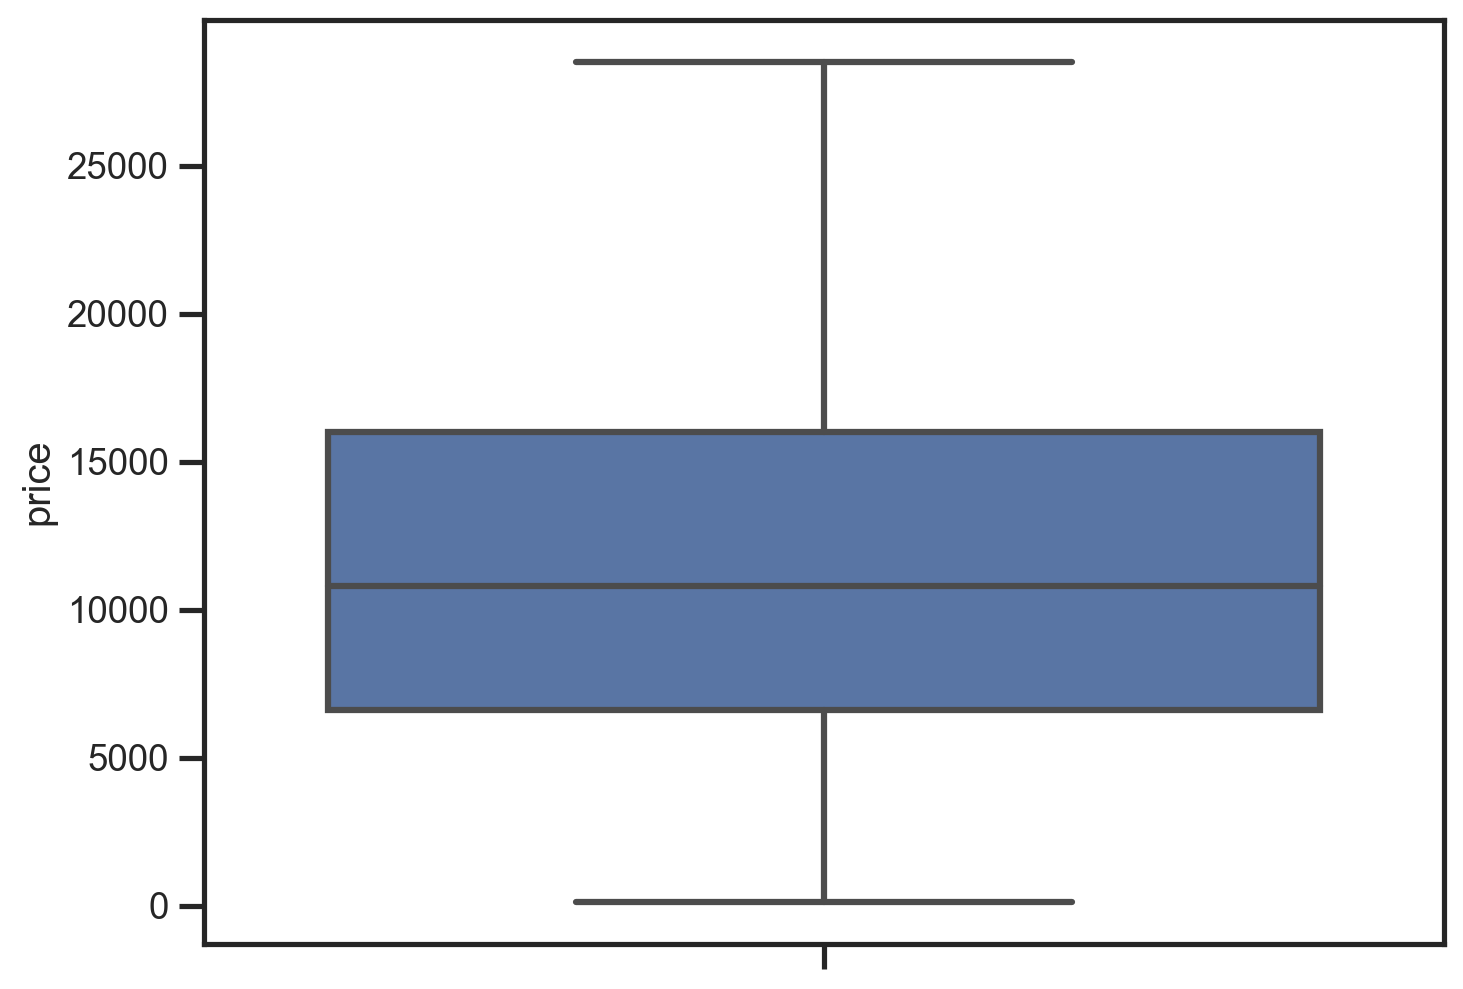

In [48]:
sns.boxplot(y=oldAdvertss[oldAdvertss['price']<=oldAdvertss['price'].quantile(0.9)]['price'])

In [49]:
oldAdvertss.loc[oldAdvertss['price'] > oldAdvertss['price'].quantile(0.9),'price'] = np.median(oldAdvertss['price'])

In [50]:
advertss = pd.concat([newAdvertss,oldAdvertss])

In [51]:
# stop

In [52]:
# advertsss= advertss[advertss['price'] <= advertss['price'].quantile(0.9)] 

<AxesSubplot:ylabel='price'>

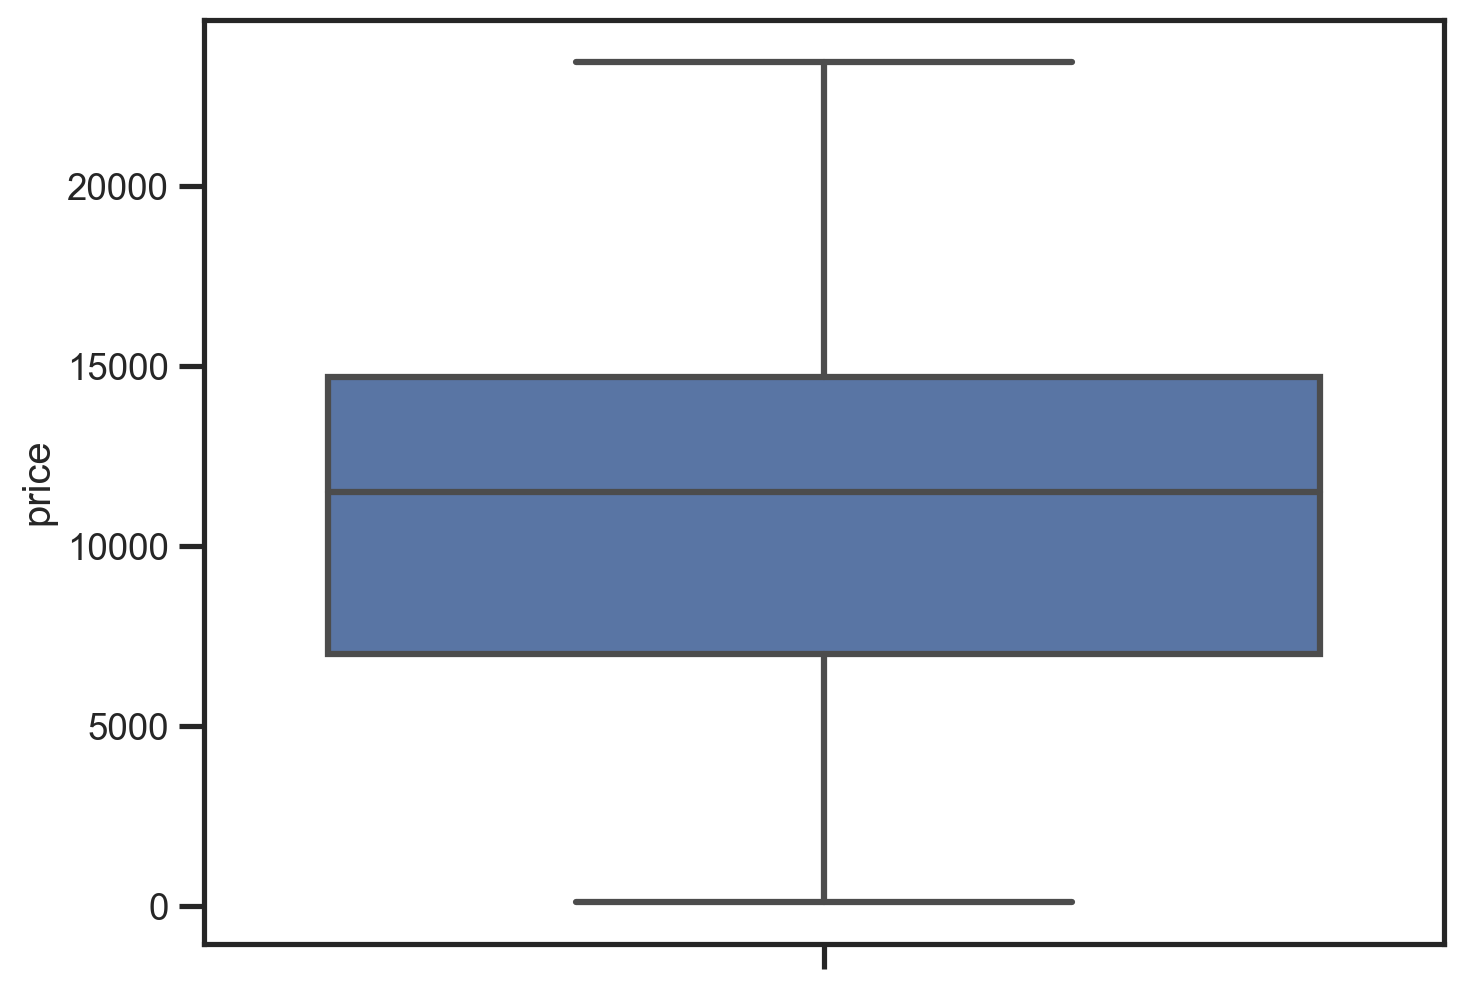

In [53]:
sns.boxplot(y=advertss[advertss['price']<=advertss['price'].quantile(0.9)]['price'])

In [54]:
advertss.shape

(402005, 13)

In [55]:
# advertsss= advertss[advertss['price'] <= advertss['price'].quantile(0.9)]

In [56]:
advertss.reset_index(drop=True).drop(columns='index')

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,26760,SUV,False,Petrol Plug-in Hybrid
1,202003318812338,0.0,NaN,Grey,Volvo,S60,NEW,NaN,40264,Saloon,False,Petrol
2,202010285552400,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,26760,SUV,False,Diesel Hybrid
3,202003278779356,0.0,NaN,Grey,Volvo,S60,NEW,NaN,42217,Saloon,False,Petrol
4,202008202742687,10.0,NaN,Black,Volvo,XC40,NEW,NaN,37138,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
402000,202008303106547,12500.0,08,Maroon,Sebring,MXR,USED,2008.0,26000,Convertible,False,Petrol
402001,202003098203101,490.0,69,Yellow,Radical,Rapture,USED,2019.0,11890,Convertible,False,Petrol
402002,201910083092619,75000.0,52,Black,Pontiac,Firebird,USED,2002.0,6990,NaN,False,Petrol
402003,202010215267034,65000.0,A,Silver,Mitsuoka,Galue,USED,2009.0,6990,Saloon,False,Petrol


#### FUEL LIST

In [57]:
# Initialize an empty list to store dataframes with filled 'fuel_type' values

fuel_type_lists = []

# Iterate over each value in 'make_types'
for L in make_types:
    # Check if the current value is 'AC'
    if L in ['AC']:
        # Create a new dataframe 'a' containing only the rows of 'advertss' where 'standard_make' is 'AC'
        a = advertss.loc[advertss['standard_make'] == L]
        # Replace any missing 'fuel_type' values with 'Petrol'
        a['fuel_type'] = a['fuel_type'].fillna('Petrol')
        # Add the updated dataframe to 'fuel_type_lists'
        fuel_type_lists.append(a)
    else:
        # Create a new dataframe 'x' containing only the rows of 'advertss' where 'standard_make' is equal to current value in 'make_types'
        x = advertss.loc[advertss['standard_make'] == L]
        # Get the mode of 'fuel_type' column in current dataframe 'x'
        e = x.fuel_type.mode()[0]
        print(L,e)
        # Replace any missing 'fuel_type' values with mode of 'fuel_type' in current dataframe
        x['fuel_type'] = x['fuel_type'].fillna(e)
        fuel_type_lists.append(x)
        
        

advertss = pd.concat(fuel_type_lists)
print(advertss.isna().sum())

Volvo Diesel
Jaguar Diesel
SKODA Petrol
Vauxhall Petrol
Land Rover Diesel
Audi Diesel
Mercedes-Benz Diesel
Volkswagen Petrol
Peugeot Petrol
SEAT Petrol
MINI Petrol
BMW Diesel
Nissan Petrol
Mitsubishi Petrol
Ferrari Petrol
Citroen Petrol
Toyota Petrol
Kia Petrol
Renault Petrol
Fiat Petrol
Honda Petrol
Bentley Petrol
DS AUTOMOBILES Petrol
Hyundai Petrol
Aston Martin Petrol
McLaren Petrol
Smart Petrol
Alfa Romeo Petrol
Porsche Petrol
Abarth Petrol
Mazda Petrol
Suzuki Petrol
MG Petrol
Dacia Petrol
Subaru Petrol
SsangYong Diesel
Maserati Petrol
Saab Diesel
Rolls-Royce Petrol
Lexus Petrol Hybrid
Jeep Petrol
Panther Petrol
Chevrolet Petrol
Lamborghini Petrol
Daihatsu Petrol
Dodge Petrol
Isuzu Diesel
Lotus Petrol
Tesla Electric
TVR Petrol
GMC Petrol
Rover Petrol
Cadillac Petrol
Infiniti Diesel
Alpine Petrol
Chrysler Diesel
Triumph Petrol
Morgan Petrol
Dax Petrol
London Taxis International Diesel
Daimler Petrol
CUPRA Petrol
Perodua Petrol
Lincoln Petrol
Bugatti Petrol
Great Wall Diesel
Replica 

#### BODY TYPE

In [58]:
# Initialize an empty list to store dataframes with filled 'body_type' values
lists = []
# Iterate over each value in 'make_types'
for L in make_types:
    # Check if the current value is one of 'Tiger','Mev','Pontiac'
    if L in ['Tiger','Mev','Pontiac']:
        # Create a new dataframe 'a' containing only the rows of 'advertss' where 'standard_make' is one of 'Tiger','Mev','Pontiac'
        a = advertss.loc[advertss['standard_make'] == L]
        # Replace any missing 'body_type' values with 'saloon'
        a['body_type'] = a['body_type'].fillna('saloon')
        # Add the updated dataframe to 'lists'
        lists.append(a)
    else:
        # Create a new dataframe 'x' containing only the rows of 'advertss' where 'standard_make' is equal to current value in 'make_types'
        x = advertss.loc[advertss['standard_make'] == L]
        # Get the mode of 'body_type' column in current dataframe 'x'

        e = x.body_type.mode()[0]
#       # Replace any missing 'body_type' values with mode of  
        x['body_type'] = x['body_type'].fillna(e)
     # Add the updated dataframe to 'lists'
        lists.append(x)
        
        

advertss = pd.concat(lists)
print(advertss.isna().sum())



index                        0
public_reference             0
mileage                      0
reg_code                 31857
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64


In [59]:
advertss[advertss['vehicle_condition']=='NEW']['year_of_registration'].value_counts(dropna=False)

NaN    31249
Name: year_of_registration, dtype: int64

In [60]:
used_adverts = advertss[advertss['vehicle_condition']=='USED']

In [61]:
used_adverts[used_adverts.year_of_registration.isna()]

,index,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
54,1256,202010225294466,18715.0,68,White,Volvo,V40,USED,NaN,16950,SUV,False,Petrol
123,3779,202008283023797,2678.0,69,Gold,Volvo,XC90,USED,NaN,11890,SUV,False,Petrol Hybrid
126,3892,202010064648254,38945.0,66,Blue,Volvo,S90,USED,NaN,18000,Saloon,False,Diesel
143,4408,202010315634408,40.0,70,Red,Volvo,V60,USED,NaN,11890,Estate,False,Petrol
189,5917,202010134931432,35421.0,67,Black,Volvo,XC90,USED,NaN,11890,SUV,False,Petrol Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401816,274772,201905178037632,700.0,NaN,White,AC,Cobra,USED,NaN,11890,Convertible,False,Petrol
401817,343931,201910243647117,700.0,NaN,Black,AC,Cobra,USED,NaN,11890,Convertible,False,Petrol
401927,80899,202010014455127,2000.0,CA,Green,Caterham,Seven,USED,NaN,21995,Convertible,False,Petrol
401968,94033,202007020778467,1900.0,18,White,Pagani,Huayra,USED,NaN,11890,Convertible,False,Petrol


In [62]:
advertss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402005 entries, 0 to 402004
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  402005 non-null  int64  
 1   public_reference       402005 non-null  int64  
 2   mileage                402005 non-null  float64
 3   reg_code               370148 non-null  object 
 4   standard_colour        402005 non-null  object 
 5   standard_make          402005 non-null  object 
 6   standard_model         402005 non-null  object 
 7   vehicle_condition      402005 non-null  object 
 8   year_of_registration   368694 non-null  float64
 9   price                  402005 non-null  int64  
 10  body_type              402005 non-null  object 
 11  crossover_car_and_van  402005 non-null  bool   
 12  fuel_type              402005 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 40.3+ MB


Filling any missing values in the 'year_of_registration' for cars which their 'vehicle_condition' column is 'NEW' with the current_year variable.

In [63]:
# adverts_2[ (adverts_2['vehicle_condition'] == 'NEW')].year_of_registration =
variable = advertss.loc[ (advertss['vehicle_condition'] == 'NEW')]

current_year = 2021

variable['year_of_registration'] = (variable['year_of_registration'].fillna(current_year))
advertss.loc[(advertss['vehicle_condition']== 'NEW')]= variable



In [64]:
new_variable = advertss.loc[ (advertss['vehicle_condition'] == 'NEW')]
current_reg_code = 71
new_variable['reg_code'] = (new_variable['reg_code'].fillna(current_reg_code))
advertss.loc[(advertss['vehicle_condition']== 'NEW')]= new_variable

In [65]:
advertss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402005 entries, 0 to 402004
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  402005 non-null  int64  
 1   public_reference       402005 non-null  int64  
 2   mileage                402005 non-null  float64
 3   reg_code               401397 non-null  object 
 4   standard_colour        402005 non-null  object 
 5   standard_make          402005 non-null  object 
 6   standard_model         402005 non-null  object 
 7   vehicle_condition      402005 non-null  object 
 8   year_of_registration   399943 non-null  float64
 9   price                  402005 non-null  int64  
 10  body_type              402005 non-null  object 
 11  crossover_car_and_van  402005 non-null  bool   
 12  fuel_type              402005 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 40.3+ MB


importing the data for Vehicle registration plates of the United Kingdom(https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom)

In [74]:
age_identifier = pd.read_csv('/Users/macbook/Downloads/age_identifier.csv')
year_identifier = pd.read_csv('/Users/macbook/Downloads/year_identifier.csv')
age_identifier2 = pd.read_csv('/Users/macbook/Downloads/age_identifier.csv')

In [75]:
age_identifier.head()

,Unnamed: 0,Year,1 March – 31 August,1 September – 28/29 February
0,0,2001,Y,51
1,1,2002,02,52
2,2,2003,03,53
3,3,2004,04,54
4,4,2005,05,55


In [76]:
year_identifier.head()

,Unnamed: 0,Letter,Dates of issue,Year
0,0,A,February 1963,1963
1,1,B,1 January 1964 – 31 December 1964,1964
2,2,C,1 January 1965 – 31 December 1965,1965
3,3,D,1 January 1966 – 31 December 1966,1966
4,4,E,1 January 1967 – 31 July 1967,1967


In [77]:
age_identifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    50 non-null     int64 
 1   Year                          50 non-null     int64 
 2   1 March – 31 August           50 non-null     object
 3   1 September – 28/29 February  50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [78]:
age_identifier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    50 non-null     int64 
 1   Year                          50 non-null     int64 
 2   1 March – 31 August           50 non-null     object
 3   1 September – 28/29 February  50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


Renaming and dropping columns that are not currently needed

In [79]:
age_identifier.drop('Unnamed: 0', axis=1, inplace=True)

In [80]:
year_identifier.drop(['Unnamed: 0','Dates of issue'],axis=1, inplace=True)

In [81]:
age_identifier2.drop('Unnamed: 0', axis=1, inplace=True)
age_identifier2.rename(columns={"1 March – 31 August": "regCode"}, inplace=True)
age_identifier2.drop('1 September – 28/29 February', axis=1, inplace=True)


In [82]:
# age_identifier['1 September – 28/29 February'] = age_identifier['1 September – 28/29 February'].rename('regCode')

age_identifier.rename(columns={"1 September – 28/29 February": "regCode"}, inplace=True)

age_identifier.drop('1 March – 31 August', axis=1, inplace=True)
age_identifier.regCode = age_identifier.regCode.astype('str')
age_identifier2.regCode = age_identifier2.regCode.astype('str') 

year_identifier.Letter = year_identifier.Letter.astype('str')
# creating a dictionary with the regcode as the key and the year as the value
# age_identifier_key_values = age_identifier.to_dict()
age_identifier_key_values = dict(zip(age_identifier.regCode, age_identifier.Year ))
age_identifier2_key_values = dict(zip(age_identifier2.regCode, age_identifier2.Year ))
year_identifier_key_values = dict(zip(year_identifier.Letter, year_identifier.Year ))
    



the function will use the values in the 'reg_code' column as keys to look up corresponding values in the 'age_identifier_key_values' dictionary, and fill the missing values in 'year_of_registration' column with the corresponding values it finds.

In [86]:
advertss['year_of_registration'] = advertss['year_of_registration'].fillna(advertss['reg_code']
                                                                          .apply(lambda x: age_identifier_key_values.get(x)))

In [87]:
advertss['year_of_registration'] = advertss['year_of_registration'].fillna(advertss['reg_code']
                                                                          .apply(lambda x: year_identifier_key_values.get(x)))

In [88]:
advertss[advertss.year_of_registration.isna()].reg_code.sort_values()[:100]


239355    02
301180    02
301474    02
401668    03
395623    03
          ..
103641    13
184696    13
177287    13
183889    13
66826     13
Name: reg_code, Length: 100, dtype: object

In [89]:
advertss['year_of_registration'] = advertss['year_of_registration'].fillna(advertss['reg_code']
                                                                          .apply(lambda x: age_identifier2_key_values.get(x)))

In [90]:
advertss.isna().sum()



index                      0
public_reference           0
mileage                    0
reg_code                 608
standard_colour            0
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration     323
price                      0
body_type                  0
crossover_car_and_van      0
fuel_type                  0
dtype: int64

In [91]:
#taking a stratified sample of the dataset using a function


In [92]:
advertss[(advertss['year_of_registration'].isnull()) & ~(advertss['reg_code'].isnull())]['reg_code'].unique()

array(['723xuu', 'CA'], dtype=object)

In [93]:
adverts[adverts.public_reference == 202010225311657]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
199987,202010225311657,104000.0,08,Silver,BMW,1 Series,USED,1008.0,4395,Convertible,False,Petrol


In [94]:
advertss[advertss.year_of_registration == 1008.0]

,index,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
236015,199987,202010225311657,28648.0,08,Silver,BMW,1 Series,USED,1008.0,4395,Convertible,False,Petrol


In [95]:
advertss.drop(advertss[advertss['year_of_registration'].isnull()].index,inplace=True)

In [96]:
advertss.drop(advertss[advertss.year_of_registration > 2021].index,inplace=True)

There are some errors with the year of registeration table which i'm able to correct manually using the reg code

In [97]:


advertss.loc[advertss['year_of_registration']== 1909, 'year_of_registration']=2009
advertss.loc[advertss['year_of_registration']== 1009, 'year_of_registration']=2009

advertss.loc[advertss['year_of_registration']== 1515, 'year_of_registration']=2015

advertss.loc[advertss['year_of_registration']== 1063.0, 'year_of_registration']=2013

advertss.loc[advertss['year_of_registration']== 999, 'year_of_registration']=2014
advertss.loc[advertss['year_of_registration']== 1007.0, 'year_of_registration']=2007
advertss.loc[advertss['year_of_registration']== 1063.0, 'year_of_registration']=2013
advertss.loc[advertss['year_of_registration']== 1016.0, 'year_of_registration']=2016
advertss.loc[advertss['year_of_registration']== 1063.0, 'year_of_registration']=2013
advertss.loc[advertss['year_of_registration']== 1015.0, 'year_of_registration']=2015
advertss.loc[advertss['year_of_registration']== 1018.0, 'year_of_registration']=2018
advertss.loc[advertss['year_of_registration']== 1017.0, 'year_of_registration']=2017
advertss.loc[advertss['year_of_registration']== 1006.0, 'year_of_registration']=2005
advertss.loc[advertss['year_of_registration']== 1010.0, 'year_of_registration']=2010
advertss.loc[advertss['year_of_registration']== 1008.0, 'year_of_registration']=2008

In [98]:
advertss.drop(columns = ['reg_code','index',], inplace= True)


In [99]:
advertss[advertss.year_of_registration == 1010.0]

,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type


In [100]:
adverts.reg_code.dtype

dtype('O')

In [101]:
advertss.drop(advertss[advertss['year_of_registration']== 2038].index,inplace=True)

In [102]:
advertss[(advertss['standard_make']=='Volkswagen')&(advertss['standard_model']=='Caddy')]


,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
147007,202010245377951,33287.0,Red,Volkswagen,Caddy,USED,2013.0,10990,Hatchback,False,Diesel
150388,202010084746951,16000.0,Black,Volkswagen,Caddy,USED,2015.0,10490,Hatchback,False,Diesel
153819,202010165059696,69475.0,Blue,Volkswagen,Caddy,USED,2013.0,8995,Hatchback,False,Diesel
155190,202010275485215,56000.0,Silver,Volkswagen,Caddy,USED,2013.0,8495,Hatchback,False,Diesel
156175,202010195173444,69000.0,Silver,Volkswagen,Caddy,USED,2013.0,9000,Hatchback,False,Diesel
160521,202008272989697,73059.0,White,Volkswagen,Caddy,USED,2013.0,9995,Hatchback,False,Diesel
161056,202010235339859,58000.0,Grey,Volkswagen,Caddy,USED,2017.0,15588,Hatchback,False,Diesel
166980,202010225298549,30000.0,Silver,Volkswagen,Caddy,USED,2014.0,10990,Hatchback,False,Diesel
168257,202009033277419,29139.0,Silver,Volkswagen,Caddy,USED,2010.0,8990,Hatchback,False,Diesel
168387,202010175117004,7991.0,Bronze,Volkswagen,Caddy,USED,2011.0,9990,Hatchback,False,Diesel


In [103]:
advertss['standard_colour'].value_counts()

Black          89160
White          71637
Grey           68704
Blue           60082
Silver         49483
Red            42176
Green           4537
Orange          4086
Yellow          2093
Brown           2013
Multicolour     1851
Beige           1537
Bronze          1329
Purple          1210
Gold             818
Pink             410
Turquoise        305
Maroon           159
Burgundy          62
Magenta           15
Navy               7
Indigo             1
Name: standard_colour, dtype: int64

In [104]:
#  advertss.loc[advertss['standard_make'] == "Mercedes-Benz"]
advertss.isna().sum()

public_reference         0
mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [131]:
advertss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401675 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401675 non-null  int64  
 1   mileage                401675 non-null  float64
 2   standard_colour        401675 non-null  object 
 3   standard_make          401675 non-null  object 
 4   standard_model         401675 non-null  object 
 5   vehicle_condition      401675 non-null  object 
 6   year_of_registration   401675 non-null  float64
 7   price                  401675 non-null  int64  
 8   body_type              401675 non-null  object 
 9   crossover_car_and_van  401675 non-null  bool   
 10  fuel_type              401675 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 34.1+ MB


In [133]:
advertss.to_csv('new_adverts.csv')

### 2.2. Feature Engineering, Data Transformations (2-3)

##### YEAR OF REGISTERATION

Looking closely at the public reference column data, it contains the year, month and day when the car advertisement was published.
By extracting the year from each public references, i can create a new column called year_of_advertisement.

In [135]:
advertss['year_of_advertisement'] = advertss.public_reference.astype(str).str[0:4].astype(int)

In [137]:
advertss.head(5)

,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,year_of_advertisement
0,202006039777689,0.0,Grey,Volvo,XC90,NEW,2021.0,26760,SUV,False,Petrol Plug-in Hybrid,2020
4,202003318812338,0.0,Grey,Volvo,S60,NEW,2021.0,40264,Saloon,False,Petrol,2020
15,202010285552400,0.0,Grey,Volvo,XC90,NEW,2021.0,26760,SUV,False,Diesel Hybrid,2020
18,202003278779356,0.0,Grey,Volvo,S60,NEW,2021.0,42217,Saloon,False,Petrol,2020
21,202008202742687,10.0,Black,Volvo,XC40,NEW,2021.0,37138,SUV,False,Diesel,2020


##### VEHICLE AGE

Based on the data set, I will assume the year of registeration as the 'born' year of the vehicle.
By subtracting the year of registeration from the present year we can get the vehicle age.

In [138]:
present_year = 2021
# being the year adopted in my data cleaning

In [140]:
advertss['vehicle_age'] =  present_year - advertss.year_of_registration

#### AVERAGE MILEAGE

Determining the average mileage of a car can be difficult. In 2019, the average number of miles driven by cars in England was 7,400, according to government statistics. These figures may not accurately reflect the current situation, as the latest available data is from 2022, which was impacted by the COVID-19 pandemic, resulting lockdowns and rising inflation. Therefore, it is more accurate to use the 2019 figures as a baseline for a typical year.

In [141]:
advertss['average_mileage'] = advertss.mileage/ advertss.vehicle_age

The 'average_mileage' column is being created by dividing the values in the 'mileage' column by the corresponding values in the 'vehicle_age' column for each row in the 'Clean_adverts' DataFrame. This results in a new column containing the average mileage of each vehicle, calculated based on its age

In [142]:
advertss.loc[advertss['average_mileage'] == np.inf, 'average_mileage'] = advertss[advertss['average_mileage'] == np.inf]['mileage']

In [144]:
advertss.average_mileage = advertss.average_mileage.fillna(0)

#### VEHICLE RATING

In [145]:
bins = [0,2500,5000,7500,12500,125000]

In [146]:
scale =['excellent', 'great', 'good', 'poor', 'very poor']

In [147]:
advertss['vehicle_rating'] = pd.cut(advertss['average_mileage'], bins, labels=scale, right=False, include_lowest=True)

The vehicle_rating values are being determined by binning the values in the average_mileage column using the bins list as the cutpoints. The resulting bins are then labeled using the scale list

##  Data Transformations

In [148]:
advertss.dtypes

public_reference            int64
mileage                   float64
standard_colour            object
standard_make              object
standard_model             object
vehicle_condition          object
year_of_registration      float64
price                       int64
body_type                  object
crossover_car_and_van        bool
fuel_type                  object
year_of_advertisement       int64
vehicle_age               float64
average_mileage           float64
vehicle_rating           category
dtype: object

splitting the features in two groups, Numerical and Categorical

In [150]:
numerical_features = ['public_reference', 'mileage', 'year_of_registration','year_of_advertisement','vehicle_age','average_mileage']
categorical_features = ['standard_colour','standard_make', 'standard_model', 'vehicle_condition','body_type','crossover_car_and_van','fuel_type','vehicle_rating']

In [152]:
advertss[categorical_features] = advertss[categorical_features].apply(lambda x: x.astype(str).str.upper())

The apply() method is being used to apply a lambda function to each value in the categorical_feature column. The lambda function first converts each value to a string using the astype() method, and then uses the str.upper() method to convert the string to upper case.

In [153]:
advertss.vehicle_condition = advertss.vehicle_condition.map({'USED': 0, 'NEW':1})

Specifically, the values 'USED' and 'NEW' are being replaced with 0 and 1, respectively. This means that any cells in the vehicle_condition column that contain the value 'USED' will be replaced with 0, and any cells that contain the value 'NEW' will be replaced with 1.

In [155]:
advertss.dtypes

public_reference           int64
mileage                  float64
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition          int64
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van     object
fuel_type                 object
year_of_advertisement      int64
vehicle_age              float64
average_mileage          float64
vehicle_rating            object
dtype: object